In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

import seaborn as sns

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# Data Set information

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

## Attributes
1. Age - Age of the patient
2. Gender - Gender of the patient
3. TB - Total Bilirubin
4. DB - Direct Bilirubin
5. Alkphos - Alkaline Phosphotase
6. Sgpt - Alamine Aminotransferase
7. Sgot - Aspartate Aminotransferase
8. TP - Total Protiens
9. ALB - Albumin
10. A/G Ratio - Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

# Read the data

In [2]:
# dataset location
dataset_location = "./dataset/ilpd_dataset.csv"

# column names
names = ['Age', 'Gender', 'TB', 'DB', 'ALKPHOS', 'SGPT', 'SGOT', 'TP', 'ALB', 'AG Ratio', 'selector']

# read dataset to pandas dataframe
df = pd.read_csv(dataset_location, names=names);

# show first five cols of the dataset
print("Data shape: ", df.shape)
df.head()

Data shape:  (583, 11)


,Age,Gender,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       583 non-null    int64  
 1   Gender    583 non-null    object 
 2   TB        583 non-null    float64
 3   DB        583 non-null    float64
 4   ALKPHOS   583 non-null    int64  
 5   SGPT      583 non-null    int64  
 6   SGOT      583 non-null    int64  
 7   TP        583 non-null    float64
 8   ALB       583 non-null    float64
 9   AG Ratio  579 non-null    float64
 10  selector  583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
df.describe()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2044c790>,
      dtype=object)

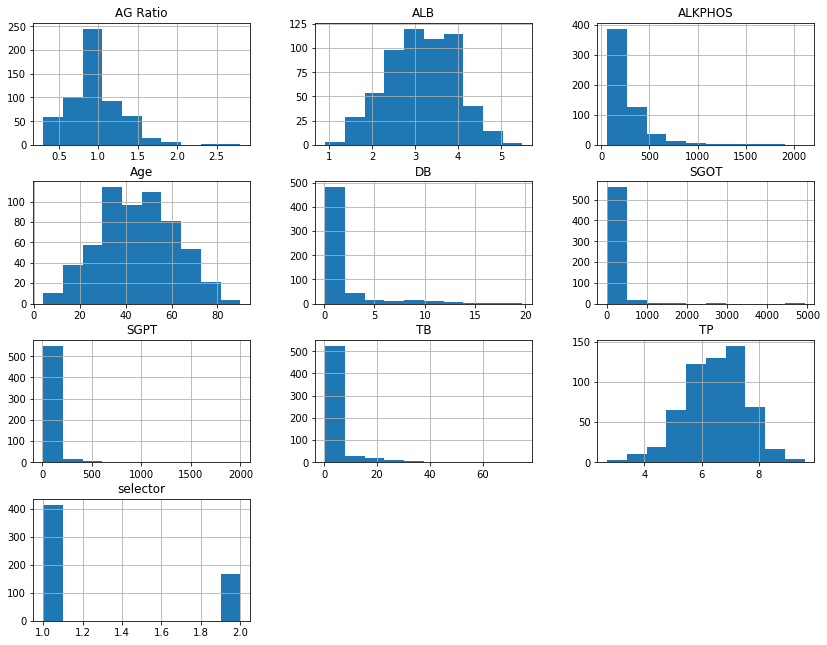

In [5]:
df.hist(figsize=(14,11))

Text(0, 0.5, 'Frequency')

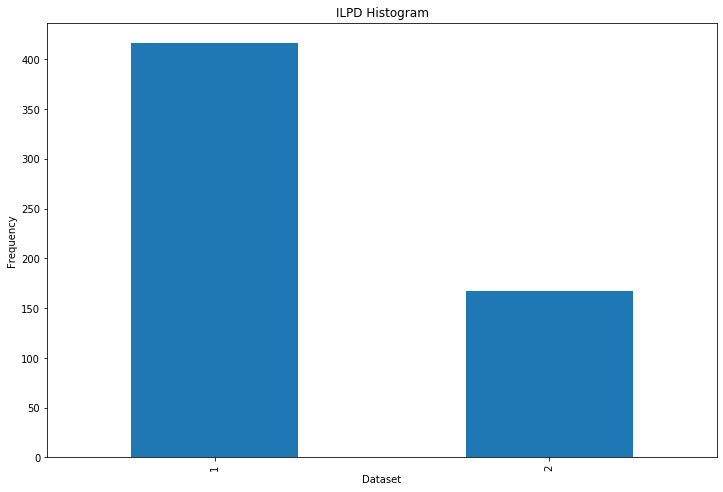

In [6]:
numb_of_classes = pd.value_counts(df['selector'], sort = True).sort_index()
numb_of_classes.plot(kind = 'bar')
plt.title("ILPD Histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")

# Preprocessing

## change non-numerical values to integers

In [7]:
# check unique values
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
# one hot value encoding
df = pd.get_dummies(df)
names = df.columns

df.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,selector,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


## remove empty values

In [9]:
# we can see that there are some null values in AG Ratio
df['AG Ratio'].fillna(value=0, inplace=True)

# check now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            583 non-null    int64  
 1   TB             583 non-null    float64
 2   DB             583 non-null    float64
 3   ALKPHOS        583 non-null    int64  
 4   SGPT           583 non-null    int64  
 5   SGOT           583 non-null    int64  
 6   TP             583 non-null    float64
 7   ALB            583 non-null    float64
 8   AG Ratio       583 non-null    float64
 9   selector       583 non-null    int64  
 10  Gender_Female  583 non-null    uint8  
 11  Gender_Male    583 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 46.8 KB


## split data into training & testing set

In [10]:
# shuffle data
df = shuffle(df)

# split data into feture set X and labels y
X = df.drop('selector', axis=1)
y = df['selector']

# show first five cols of feature set
X.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
537,10,0.8,0.1,395,25,75,7.6,3.6,0.9,1,0
293,23,1.1,0.5,191,37,41,7.7,4.3,1.2,0,1
185,38,1.5,0.4,298,60,103,6.0,3.0,1.0,0,1
380,50,1.7,0.8,331,36,53,7.3,3.4,0.9,0,1
218,6,0.6,0.1,289,38,30,4.8,2.0,0.7,0,1


In [11]:
# show unique labels
y.unique()

array([1, 2])

In [12]:
# set number of test samples
test_size = 0.18
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
print("Number of test samples (X): ", X_test.shape[0])
print("Number of test samples (y): ", y_test.shape[0])

print("Number of train samples (X): ", X_train.shape[0])
print("Number of train samples (y): ", y_train.shape[0])

Number of test samples (X):  146
Number of test samples (y):  146
Number of train samples (X):  437
Number of train samples (y):  437


## feature scaling

In [14]:
# we can see that the ranges of particular features are very different
# we need to scale those features to fix that
#scaler = StandardScaler()
scaler = MinMaxScaler()

X_train_before = X_train.copy(deep=True)

# fit only for training data
scaler.fit(X_train)

# transform training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# show train set
X_train = pd.DataFrame(X_train, columns=X_train_before.columns)
X_train.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
0,0.232558,0.038874,0.076531,0.060556,0.000503,0.004676,0.710145,0.652174,0.357143,0.0,1.0
1,0.511628,0.006702,0.005102,0.060011,0.008040,0.003456,0.507246,0.478261,0.357143,1.0,0.0
2,0.302326,0.004021,0.005102,0.000000,0.010553,0.003456,0.449275,0.543478,0.500000,1.0,0.0
3,0.348837,0.049598,0.096939,0.123295,0.434673,0.146575,0.333333,0.391304,0.392857,0.0,1.0
4,0.104651,0.014745,0.020408,0.279324,0.009548,0.002846,0.753623,0.652174,0.321429,0.0,1.0


In [15]:
# show test set
X_test = pd.DataFrame(X_test, columns=X_train_before.columns)
X_test.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
0,0.825581,0.084450,0.178571,0.215494,0.094472,0.027038,0.507246,0.500000,0.357143,0.0,1.0
1,0.255814,0.021448,0.040816,0.072013,0.007035,0.011181,0.739130,0.739130,0.428571,0.0,1.0
2,0.523256,0.046917,0.102041,0.068740,0.027638,0.034763,0.608696,0.456522,0.250000,0.0,1.0
3,0.581395,0.006702,0.005102,0.123841,0.002513,0.001626,0.492754,0.413043,0.285714,0.0,1.0
4,0.430233,0.095174,0.214286,0.046918,0.042211,0.016670,0.521739,0.478261,0.321429,0.0,1.0


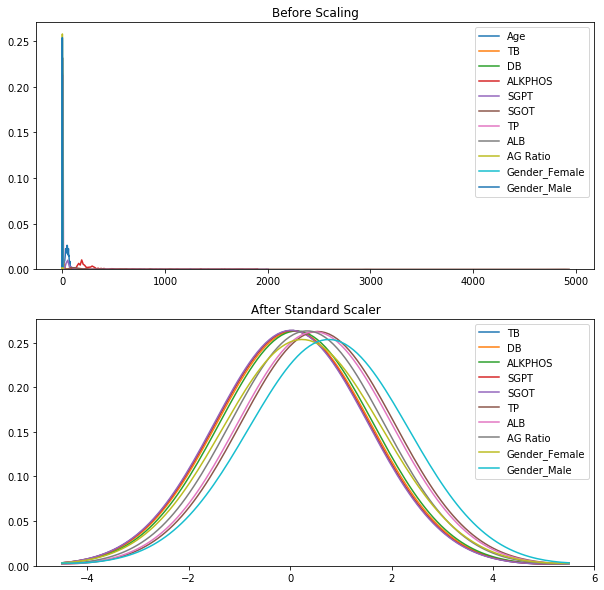

In [16]:
# show difference
labels = X_train_before.columns
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))
bw_value = 1.5

ax1.set_title('Before Scaling')
sns.kdeplot(X_train_before['Age'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['TB'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['DB'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['ALKPHOS'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['SGPT'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['SGOT'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['TP'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['ALB'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['AG Ratio'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['Gender_Female'], ax=ax1, bw=bw_value)
sns.kdeplot(X_train_before['Gender_Male'], ax=ax1, bw=bw_value)

ax2.set_title('After Standard Scaler')
sns.kdeplot(X_train['TB'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['DB'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['ALKPHOS'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['SGPT'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['SGOT'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['TP'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['ALB'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['AG Ratio'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['Gender_Female'], ax=ax2, bw=bw_value)
sns.kdeplot(X_train['Gender_Male'], ax=ax2, bw=bw_value)

plt.show()

# Feature selection

## check correlations between the features heatmap

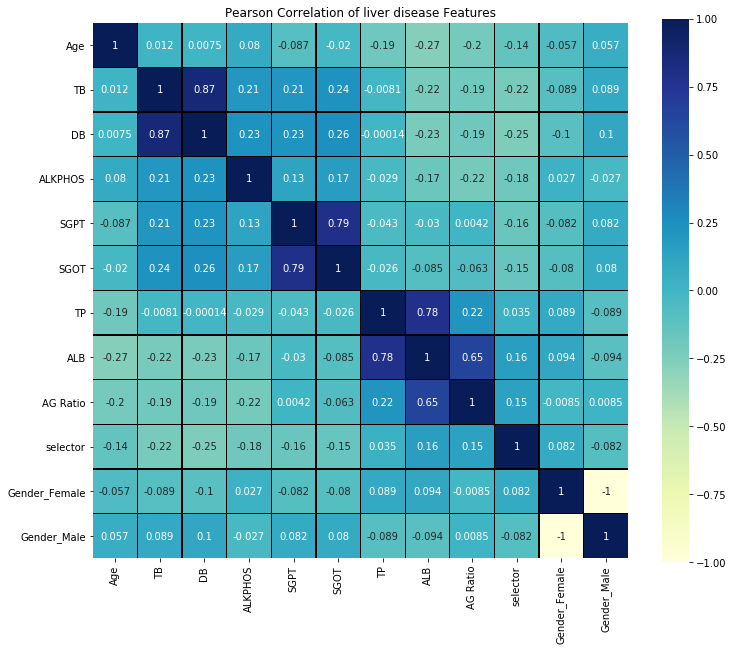

In [17]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')

# Draw the heatmap using seaborn
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

As we can see above:
- DB & TB
- SGOT & SGPT
- ALB & TP
- ALB & AG Ratio

are highly correlated. Now we need to make a feature ranking to decide what features we want to use in classification.

# Training and predictions (no feature selection)

In [18]:
df.shape

(583, 12)

In [19]:
# create 2 layers of 20 nodes each + 2000 iterations
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(20), max_iter=2000, activation='tanh', learning_rate_init=0.02)

# train algorithm on training data
mlp.fit(X_train, y_train.values.ravel())

# make predictions
predictions = mlp.predict(X_test)

# accuracy score
acc = accuracy_score(y_test, predictions)

# Check the results

In [20]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print("Accuracy Using MLP: " + str(acc)+'\n')

[[94  4]
 [39  9]]
              precision    recall  f1-score   support

           1       0.71      0.96      0.81        98
           2       0.69      0.19      0.30        48

    accuracy                           0.71       146
   macro avg       0.70      0.57      0.55       146
weighted avg       0.70      0.71      0.64       146

Accuracy Using MLP: 0.7054794520547946



# Training and predictions (feature selection)

## select features

In [21]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

new_X_train = X_train.filter(['DB', 'TB', 'SGOT', 'SGPT', 'ALB', 'TP'], axis=1)
new_X_test = X_test.filter(['DB', 'TB', 'SGOT', 'SGPT', 'ALB', 'TP'], axis=1)


new_X_train.head()

,DB,TB,SGOT,SGPT,ALB,TP
0,0.076531,0.038874,0.004676,0.000503,0.652174,0.710145
1,0.005102,0.006702,0.003456,0.008040,0.478261,0.507246
2,0.005102,0.004021,0.003456,0.010553,0.543478,0.449275
3,0.096939,0.049598,0.146575,0.434673,0.391304,0.333333
4,0.020408,0.014745,0.002846,0.009548,0.652174,0.753623


In [22]:
new_X_test.head()

,DB,TB,SGOT,SGPT,ALB,TP
0,0.178571,0.084450,0.027038,0.094472,0.500000,0.507246
1,0.040816,0.021448,0.011181,0.007035,0.739130,0.739130
2,0.102041,0.046917,0.034763,0.027638,0.456522,0.608696
3,0.005102,0.006702,0.001626,0.002513,0.413043,0.492754
4,0.214286,0.095174,0.016670,0.042211,0.478261,0.521739


## train & test

In [23]:
# create 2 layers of 20 nodes each + 2000 iterations
#mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(30), max_iter=4000, activation='tanh', learning_rate_init=0.02)
mlp = MLPClassifier(hidden_layer_sizes=(30), max_iter=2000, alpha=1e-4,
                  solver='adam', verbose=10, tol=1e-4, random_state=1,
                  learning_rate_init=0.01)

# train algorithm on training data
mlp.fit(new_X_train, y_train.values.ravel())

# make predictions
predictions = mlp.predict(new_X_test)

# accuracy score
acc = accuracy_score(y_test, predictions)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print("Accuracy Using MLP: " + str(acc)+'\n')

Iteration 1, loss = 0.68886263
Iteration 2, loss = 0.61642967
Iteration 3, loss = 0.58524173
Iteration 4, loss = 0.58104772
Iteration 5, loss = 0.58574705
Iteration 6, loss = 0.58841883
Iteration 7, loss = 0.58095024
Iteration 8, loss = 0.56907604
Iteration 9, loss = 0.56126939
Iteration 10, loss = 0.55665147
Iteration 11, loss = 0.55262320
Iteration 12, loss = 0.54868669
Iteration 13, loss = 0.54461560
Iteration 14, loss = 0.54072656
Iteration 15, loss = 0.53676177
Iteration 16, loss = 0.53376633
Iteration 17, loss = 0.53001465
Iteration 18, loss = 0.52734071
Iteration 19, loss = 0.52494760
Iteration 20, loss = 0.52189916
Iteration 21, loss = 0.51951786
Iteration 22, loss = 0.51794265
Iteration 23, loss = 0.51521948
Iteration 24, loss = 0.51563729
Iteration 25, loss = 0.51345607
Iteration 26, loss = 0.51209067
Iteration 27, loss = 0.51066619
Iteration 28, loss = 0.50945183
Iteration 29, loss = 0.50761390
Iteration 30, loss = 0.50678051
Iteration 31, loss = 0.50612931
Iteration 32, los

/Users/kamil/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## plot learning curve

In [24]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    #http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Iteration 1, loss = 0.70713396
Iteration 2, loss = 0.68110822
Iteration 3, loss = 0.66028790
Iteration 4, loss = 0.64408689
Iteration 5, loss = 0.63211073
Iteration 6, loss = 0.62406831
Iteration 7, loss = 0.61917153
Iteration 8, loss = 0.61689580
Iteration 9, loss = 0.61651766
Iteration 10, loss = 0.61694048
Iteration 11, loss = 0.61735571
Iteration 12, loss = 0.61720612
Iteration 13, loss = 0.61622944
Iteration 14, loss = 0.61432024
Iteration 15, loss = 0.61187826
Iteration 16, loss = 0.60904002
Iteration 17, loss = 0.60572611
Iteration 18, loss = 0.60249562
Iteration 19, loss = 0.59957173
Iteration 20, loss = 0.59694726
Iteration 21, loss = 0.59471854
Iteration 22, loss = 0.59299021
Iteration 23, loss = 0.59159170
Iteration 24, loss = 0.59028531
Iteration 25, loss = 0.58889801
Iteration 26, loss = 0.58722319
Iteration 27, loss = 0.58543969
Iteration 28, loss = 0.58367972
Iteration 29, loss = 0.58182384
Iteration 30, loss = 0.57998147
Iteration 31, loss = 0.57810601
Iteration 32, los

Iteration 254, loss = 0.44040223
Iteration 255, loss = 0.44018245
Iteration 256, loss = 0.44017037
Iteration 257, loss = 0.43985723
Iteration 258, loss = 0.43979783
Iteration 259, loss = 0.43964685
Iteration 260, loss = 0.43945054
Iteration 261, loss = 0.43921423
Iteration 262, loss = 0.43906561
Iteration 263, loss = 0.43887294
Iteration 264, loss = 0.43870035
Iteration 265, loss = 0.43863155
Iteration 266, loss = 0.43834087
Iteration 267, loss = 0.43819524
Iteration 268, loss = 0.43799551
Iteration 269, loss = 0.43786866
Iteration 270, loss = 0.43765533
Iteration 271, loss = 0.43751597
Iteration 272, loss = 0.43736373
Iteration 273, loss = 0.43714903
Iteration 274, loss = 0.43689835
Iteration 275, loss = 0.43676440
Iteration 276, loss = 0.43656169
Iteration 277, loss = 0.43633496
Iteration 278, loss = 0.43624015
Iteration 279, loss = 0.43600114
Iteration 280, loss = 0.43593052
Iteration 281, loss = 0.43569035
Iteration 282, loss = 0.43539546
Iteration 283, loss = 0.43522825
Iteration 

Iteration 537, loss = 0.35393249
Iteration 538, loss = 0.35386607
Iteration 539, loss = 0.35324449
Iteration 540, loss = 0.35300527
Iteration 541, loss = 0.35255006
Iteration 542, loss = 0.35238992
Iteration 543, loss = 0.35200324
Iteration 544, loss = 0.35157579
Iteration 545, loss = 0.35137534
Iteration 546, loss = 0.35106557
Iteration 547, loss = 0.35054462
Iteration 548, loss = 0.34992481
Iteration 549, loss = 0.35039937
Iteration 550, loss = 0.34964571
Iteration 551, loss = 0.34907313
Iteration 552, loss = 0.34872166
Iteration 553, loss = 0.34835417
Iteration 554, loss = 0.34792656
Iteration 555, loss = 0.34774508
Iteration 556, loss = 0.34754386
Iteration 557, loss = 0.34714139
Iteration 558, loss = 0.34693050
Iteration 559, loss = 0.34670377
Iteration 560, loss = 0.34632981
Iteration 561, loss = 0.34570932
Iteration 562, loss = 0.34516028
Iteration 563, loss = 0.34500408
Iteration 564, loss = 0.34449627
Iteration 565, loss = 0.34419875
Iteration 566, loss = 0.34398404
Iteration 

Iteration 834, loss = 0.27154716
Iteration 835, loss = 0.27120013
Iteration 836, loss = 0.27086074
Iteration 837, loss = 0.27092084
Iteration 838, loss = 0.27047929
Iteration 839, loss = 0.27038422
Iteration 840, loss = 0.27020228
Iteration 841, loss = 0.26997297
Iteration 842, loss = 0.26963278
Iteration 843, loss = 0.26924194
Iteration 844, loss = 0.26934035
Iteration 845, loss = 0.26882037
Iteration 846, loss = 0.26872330
Iteration 847, loss = 0.26852000
Iteration 848, loss = 0.26812540
Iteration 849, loss = 0.26798282
Iteration 850, loss = 0.26754283
Iteration 851, loss = 0.26778084
Iteration 852, loss = 0.26707070
Iteration 853, loss = 0.26698936
Iteration 854, loss = 0.26687233
Iteration 855, loss = 0.26624074
Iteration 856, loss = 0.26630652
Iteration 857, loss = 0.26592499
Iteration 858, loss = 0.26571972
Iteration 859, loss = 0.26534588
Iteration 860, loss = 0.26488707
Iteration 861, loss = 0.26466717
Iteration 862, loss = 0.26474464
Iteration 863, loss = 0.26405823
Iteration 

Iteration 1096, loss = 0.18733000
Iteration 1097, loss = 0.18717086
Iteration 1098, loss = 0.18684138
Iteration 1099, loss = 0.18644359
Iteration 1100, loss = 0.18595013
Iteration 1101, loss = 0.18585620
Iteration 1102, loss = 0.18536857
Iteration 1103, loss = 0.18520913
Iteration 1104, loss = 0.18526718
Iteration 1105, loss = 0.18497630
Iteration 1106, loss = 0.18475475
Iteration 1107, loss = 0.18431019
Iteration 1108, loss = 0.18398924
Iteration 1109, loss = 0.18382614
Iteration 1110, loss = 0.18301814
Iteration 1111, loss = 0.18323213
Iteration 1112, loss = 0.18305686
Iteration 1113, loss = 0.18251280
Iteration 1114, loss = 0.18245486
Iteration 1115, loss = 0.18241237
Iteration 1116, loss = 0.18215115
Iteration 1117, loss = 0.18173926
Iteration 1118, loss = 0.18133039
Iteration 1119, loss = 0.18098557
Iteration 1120, loss = 0.18129110
Iteration 1121, loss = 0.18057403
Iteration 1122, loss = 0.18025344
Iteration 1123, loss = 0.18058253
Iteration 1124, loss = 0.17981540
Iteration 1125

Iteration 1352, loss = 0.13496500
Iteration 1353, loss = 0.13502940
Iteration 1354, loss = 0.13468605
Iteration 1355, loss = 0.13452044
Iteration 1356, loss = 0.13470950
Iteration 1357, loss = 0.13486549
Iteration 1358, loss = 0.13461619
Iteration 1359, loss = 0.13377415
Iteration 1360, loss = 0.13359626
Iteration 1361, loss = 0.13361368
Iteration 1362, loss = 0.13348297
Iteration 1363, loss = 0.13326283
Iteration 1364, loss = 0.13334420
Iteration 1365, loss = 0.13326032
Iteration 1366, loss = 0.13346187
Iteration 1367, loss = 0.13315195
Iteration 1368, loss = 0.13266788
Iteration 1369, loss = 0.13239868
Iteration 1370, loss = 0.13264279
Iteration 1371, loss = 0.13227551
Iteration 1372, loss = 0.13241706
Iteration 1373, loss = 0.13225465
Iteration 1374, loss = 0.13196462
Iteration 1375, loss = 0.13153710
Iteration 1376, loss = 0.13094885
Iteration 1377, loss = 0.13146889
Iteration 1378, loss = 0.13147338
Iteration 1379, loss = 0.13128395
Iteration 1380, loss = 0.13055252
Iteration 1381

Iteration 1633, loss = 0.10196452
Iteration 1634, loss = 0.10176731
Iteration 1635, loss = 0.10118969
Iteration 1636, loss = 0.10146496
Iteration 1637, loss = 0.10147585
Iteration 1638, loss = 0.10136945
Iteration 1639, loss = 0.10108964
Iteration 1640, loss = 0.10117409
Iteration 1641, loss = 0.10107061
Iteration 1642, loss = 0.10094491
Iteration 1643, loss = 0.10068829
Iteration 1644, loss = 0.10020379
Iteration 1645, loss = 0.10069287
Iteration 1646, loss = 0.10086700
Iteration 1647, loss = 0.10035043
Iteration 1648, loss = 0.10043354
Iteration 1649, loss = 0.10059436
Iteration 1650, loss = 0.10017448
Iteration 1651, loss = 0.10041353
Iteration 1652, loss = 0.09994502
Iteration 1653, loss = 0.09973395
Iteration 1654, loss = 0.09962207
Iteration 1655, loss = 0.09949451
Iteration 1656, loss = 0.09982705
Iteration 1657, loss = 0.09978398
Iteration 1658, loss = 0.09912180
Iteration 1659, loss = 0.09935751
Iteration 1660, loss = 0.09943645
Iteration 1661, loss = 0.09924830
Iteration 1662

Iteration 1910, loss = 0.08088676
Iteration 1911, loss = 0.08100226
Iteration 1912, loss = 0.08065529
Iteration 1913, loss = 0.08035703
Iteration 1914, loss = 0.08086680
Iteration 1915, loss = 0.08063183
Iteration 1916, loss = 0.08011071
Iteration 1917, loss = 0.08058092
Iteration 1918, loss = 0.08069941
Iteration 1919, loss = 0.08052687
Iteration 1920, loss = 0.08054002
Iteration 1921, loss = 0.08043548
Iteration 1922, loss = 0.08009732
Iteration 1923, loss = 0.08000711
Iteration 1924, loss = 0.08001666
Iteration 1925, loss = 0.07962490
Iteration 1926, loss = 0.07962008
Iteration 1927, loss = 0.08003088
Iteration 1928, loss = 0.07996598
Iteration 1929, loss = 0.07967309
Iteration 1930, loss = 0.07971935
Iteration 1931, loss = 0.07964050
Iteration 1932, loss = 0.07918931
Iteration 1933, loss = 0.07922219
Iteration 1934, loss = 0.07928372
Iteration 1935, loss = 0.07895132
Iteration 1936, loss = 0.07903796
Iteration 1937, loss = 0.07903155
Iteration 1938, loss = 0.07905848
Iteration 1939

/Users/kamil/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 0.64854252
Iteration 4, loss = 0.62638314
Iteration 5, loss = 0.60855005
Iteration 6, loss = 0.59477648
Iteration 7, loss = 0.58446653
Iteration 8, loss = 0.57739559
Iteration 9, loss = 0.57322249
Iteration 10, loss = 0.57136152
Iteration 11, loss = 0.57111781
Iteration 12, loss = 0.57164333
Iteration 13, loss = 0.57221657
Iteration 14, loss = 0.57244485
Iteration 15, loss = 0.57222145
Iteration 16, loss = 0.57094824
Iteration 17, loss = 0.56867061
Iteration 18, loss = 0.56590223
Iteration 19, loss = 0.56283652
Iteration 20, loss = 0.55956470
Iteration 21, loss = 0.55638109
Iteration 22, loss = 0.55351549
Iteration 23, loss = 0.55084227
Iteration 24, loss = 0.54834857
Iteration 25, loss = 0.54599434
Iteration 26, loss = 0.54380696
Iteration 27, loss = 0.54188093
Iteration 28, loss = 0.54015362
Iteration 29, loss = 0.53850172
Iteration 30, loss = 0.53679819
Iteration 31, loss = 0.53517599
Iteration 32, loss = 0.53361486
Iteration 33, loss = 0.53205752
Iteration 34, l

Iteration 82, loss = 0.47521679
Iteration 83, loss = 0.47354102
Iteration 84, loss = 0.47127884
Iteration 85, loss = 0.47219971
Iteration 86, loss = 0.47238076
Iteration 87, loss = 0.47053863
Iteration 88, loss = 0.47019141
Iteration 89, loss = 0.47114916
Iteration 90, loss = 0.47098126
Iteration 91, loss = 0.46928949
Iteration 92, loss = 0.47011454
Iteration 93, loss = 0.47413482
Iteration 94, loss = 0.47450359
Iteration 95, loss = 0.47124417
Iteration 96, loss = 0.46796510
Iteration 97, loss = 0.47123564
Iteration 98, loss = 0.47409770
Iteration 99, loss = 0.47116497
Iteration 100, loss = 0.46868351
Iteration 101, loss = 0.47258133
Iteration 102, loss = 0.47403290
Iteration 103, loss = 0.46959873
Iteration 104, loss = 0.46871035
Iteration 105, loss = 0.46907506
Iteration 106, loss = 0.46900826
Iteration 107, loss = 0.46964688
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69485875
Iteration 2, loss = 0.64068368
Iteratio

Iteration 245, loss = 0.46589198
Iteration 246, loss = 0.46561508
Iteration 247, loss = 0.46591663
Iteration 248, loss = 0.46593815
Iteration 249, loss = 0.46553823
Iteration 250, loss = 0.46591390
Iteration 251, loss = 0.46550214
Iteration 252, loss = 0.46534192
Iteration 253, loss = 0.46521454
Iteration 254, loss = 0.46523060
Iteration 255, loss = 0.46536898
Iteration 256, loss = 0.46524525
Iteration 257, loss = 0.46544863
Iteration 258, loss = 0.46512440
Iteration 259, loss = 0.46478460
Iteration 260, loss = 0.46604243
Iteration 261, loss = 0.46513165
Iteration 262, loss = 0.46467518
Iteration 263, loss = 0.46560601
Iteration 264, loss = 0.46493464
Iteration 265, loss = 0.46550888
Iteration 266, loss = 0.46517399
Iteration 267, loss = 0.46505216
Iteration 268, loss = 0.46470296
Iteration 269, loss = 0.46449072
Iteration 270, loss = 0.46431056
Iteration 271, loss = 0.46421967
Iteration 272, loss = 0.46453273
Iteration 273, loss = 0.46390243
Iteration 274, loss = 0.46465654
Iteration 

Iteration 277, loss = 0.43521175
Iteration 278, loss = 0.43467570
Iteration 279, loss = 0.43428301
Iteration 280, loss = 0.43378182
Iteration 281, loss = 0.43323497
Iteration 282, loss = 0.43272382
Iteration 283, loss = 0.43219032
Iteration 284, loss = 0.43185573
Iteration 285, loss = 0.43131813
Iteration 286, loss = 0.43080433
Iteration 287, loss = 0.43049369
Iteration 288, loss = 0.43004013
Iteration 289, loss = 0.42959651
Iteration 290, loss = 0.42915084
Iteration 291, loss = 0.42861409
Iteration 292, loss = 0.42804575
Iteration 293, loss = 0.42763137
Iteration 294, loss = 0.42718209
Iteration 295, loss = 0.42676520
Iteration 296, loss = 0.42635108
Iteration 297, loss = 0.42587032
Iteration 298, loss = 0.42531532
Iteration 299, loss = 0.42496377
Iteration 300, loss = 0.42457110
Iteration 301, loss = 0.42404466
Iteration 302, loss = 0.42351441
Iteration 303, loss = 0.42298334
Iteration 304, loss = 0.42240687
Iteration 305, loss = 0.42209044
Iteration 306, loss = 0.42169817
Iteration 

Iteration 571, loss = 0.29862414
Iteration 572, loss = 0.29839018
Iteration 573, loss = 0.29757705
Iteration 574, loss = 0.29734990
Iteration 575, loss = 0.29705136
Iteration 576, loss = 0.29644031
Iteration 577, loss = 0.29586287
Iteration 578, loss = 0.29575203
Iteration 579, loss = 0.29527509
Iteration 580, loss = 0.29439515
Iteration 581, loss = 0.29416881
Iteration 582, loss = 0.29398682
Iteration 583, loss = 0.29353745
Iteration 584, loss = 0.29310209
Iteration 585, loss = 0.29260392
Iteration 586, loss = 0.29197819
Iteration 587, loss = 0.29189397
Iteration 588, loss = 0.29128728
Iteration 589, loss = 0.29063226
Iteration 590, loss = 0.29042971
Iteration 591, loss = 0.28995872
Iteration 592, loss = 0.28969086
Iteration 593, loss = 0.28926050
Iteration 594, loss = 0.28863408
Iteration 595, loss = 0.28807879
Iteration 596, loss = 0.28782032
Iteration 597, loss = 0.28735097
Iteration 598, loss = 0.28684898
Iteration 599, loss = 0.28654377
Iteration 600, loss = 0.28620073
Iteration 

Iteration 853, loss = 0.20224140
Iteration 854, loss = 0.20190358
Iteration 855, loss = 0.20172115
Iteration 856, loss = 0.20144007
Iteration 857, loss = 0.20093558
Iteration 858, loss = 0.20088030
Iteration 859, loss = 0.20069370
Iteration 860, loss = 0.20057787
Iteration 861, loss = 0.19997933
Iteration 862, loss = 0.19995341
Iteration 863, loss = 0.20020765
Iteration 864, loss = 0.19967198
Iteration 865, loss = 0.19906962
Iteration 866, loss = 0.19917632
Iteration 867, loss = 0.19919962
Iteration 868, loss = 0.19849441
Iteration 869, loss = 0.19791178
Iteration 870, loss = 0.19847891
Iteration 871, loss = 0.19826450
Iteration 872, loss = 0.19743781
Iteration 873, loss = 0.19735881
Iteration 874, loss = 0.19727184
Iteration 875, loss = 0.19681056
Iteration 876, loss = 0.19641385
Iteration 877, loss = 0.19612951
Iteration 878, loss = 0.19583202
Iteration 879, loss = 0.19573749
Iteration 880, loss = 0.19557524
Iteration 881, loss = 0.19530857
Iteration 882, loss = 0.19493930
Iteration 

Iteration 1134, loss = 0.14595663
Iteration 1135, loss = 0.14579990
Iteration 1136, loss = 0.14559540
Iteration 1137, loss = 0.14534438
Iteration 1138, loss = 0.14518156
Iteration 1139, loss = 0.14508582
Iteration 1140, loss = 0.14488669
Iteration 1141, loss = 0.14462538
Iteration 1142, loss = 0.14445578
Iteration 1143, loss = 0.14434818
Iteration 1144, loss = 0.14417672
Iteration 1145, loss = 0.14400355
Iteration 1146, loss = 0.14392078
Iteration 1147, loss = 0.14378955
Iteration 1148, loss = 0.14374210
Iteration 1149, loss = 0.14345643
Iteration 1150, loss = 0.14328753
Iteration 1151, loss = 0.14320282
Iteration 1152, loss = 0.14318406
Iteration 1153, loss = 0.14290601
Iteration 1154, loss = 0.14266607
Iteration 1155, loss = 0.14248648
Iteration 1156, loss = 0.14241678
Iteration 1157, loss = 0.14237585
Iteration 1158, loss = 0.14210297
Iteration 1159, loss = 0.14192571
Iteration 1160, loss = 0.14173572
Iteration 1161, loss = 0.14158995
Iteration 1162, loss = 0.14148553
Iteration 1163

Iteration 1428, loss = 0.10654371
Iteration 1429, loss = 0.10649896
Iteration 1430, loss = 0.10631858
Iteration 1431, loss = 0.10610451
Iteration 1432, loss = 0.10598443
Iteration 1433, loss = 0.10587753
Iteration 1434, loss = 0.10578328
Iteration 1435, loss = 0.10573051
Iteration 1436, loss = 0.10568293
Iteration 1437, loss = 0.10561005
Iteration 1438, loss = 0.10549099
Iteration 1439, loss = 0.10527000
Iteration 1440, loss = 0.10514753
Iteration 1441, loss = 0.10503039
Iteration 1442, loss = 0.10492442
Iteration 1443, loss = 0.10482207
Iteration 1444, loss = 0.10483060
Iteration 1445, loss = 0.10469323
Iteration 1446, loss = 0.10447584
Iteration 1447, loss = 0.10441291
Iteration 1448, loss = 0.10436765
Iteration 1449, loss = 0.10425601
Iteration 1450, loss = 0.10407921
Iteration 1451, loss = 0.10394075
Iteration 1452, loss = 0.10381357
Iteration 1453, loss = 0.10374112
Iteration 1454, loss = 0.10369054
Iteration 1455, loss = 0.10357329
Iteration 1456, loss = 0.10340651
Iteration 1457

Iteration 1726, loss = 0.07854479
Iteration 1727, loss = 0.07848821
Iteration 1728, loss = 0.07838911
Iteration 1729, loss = 0.07828258
Iteration 1730, loss = 0.07819452
Iteration 1731, loss = 0.07810317
Iteration 1732, loss = 0.07807895
Iteration 1733, loss = 0.07799040
Iteration 1734, loss = 0.07786823
Iteration 1735, loss = 0.07784767
Iteration 1736, loss = 0.07781264
Iteration 1737, loss = 0.07776804
Iteration 1738, loss = 0.07768169
Iteration 1739, loss = 0.07755064
Iteration 1740, loss = 0.07743677
Iteration 1741, loss = 0.07735079
Iteration 1742, loss = 0.07725135
Iteration 1743, loss = 0.07739031
Iteration 1744, loss = 0.07739449
Iteration 1745, loss = 0.07732573
Iteration 1746, loss = 0.07710535
Iteration 1747, loss = 0.07697100
Iteration 1748, loss = 0.07684151
Iteration 1749, loss = 0.07677538
Iteration 1750, loss = 0.07673971
Iteration 1751, loss = 0.07667394
Iteration 1752, loss = 0.07666843
Iteration 1753, loss = 0.07659018
Iteration 1754, loss = 0.07641333
Iteration 1755

Iteration 187, loss = 0.50118845
Iteration 188, loss = 0.50100403
Iteration 189, loss = 0.50081673
Iteration 190, loss = 0.50063595
Iteration 191, loss = 0.50043001
Iteration 192, loss = 0.50022314
Iteration 193, loss = 0.50007479
Iteration 194, loss = 0.49990088
Iteration 195, loss = 0.49970654
Iteration 196, loss = 0.49949169
Iteration 197, loss = 0.49930913
Iteration 198, loss = 0.49918542
Iteration 199, loss = 0.49898629
Iteration 200, loss = 0.49875987
Iteration 201, loss = 0.49861219
Iteration 202, loss = 0.49845485
Iteration 203, loss = 0.49822632
Iteration 204, loss = 0.49804699
Iteration 205, loss = 0.49787936
Iteration 206, loss = 0.49771717
Iteration 207, loss = 0.49753970
Iteration 208, loss = 0.49738558
Iteration 209, loss = 0.49722243
Iteration 210, loss = 0.49703998
Iteration 211, loss = 0.49688578
Iteration 212, loss = 0.49671686
Iteration 213, loss = 0.49652976
Iteration 214, loss = 0.49637214
Iteration 215, loss = 0.49619067
Iteration 216, loss = 0.49604090
Iteration 

Iteration 508, loss = 0.44103810
Iteration 509, loss = 0.44107055
Iteration 510, loss = 0.44079014
Iteration 511, loss = 0.44066549
Iteration 512, loss = 0.44035685
Iteration 513, loss = 0.44006167
Iteration 514, loss = 0.43998282
Iteration 515, loss = 0.43972335
Iteration 516, loss = 0.43947385
Iteration 517, loss = 0.43925851
Iteration 518, loss = 0.43903225
Iteration 519, loss = 0.43879172
Iteration 520, loss = 0.43860089
Iteration 521, loss = 0.43838490
Iteration 522, loss = 0.43821004
Iteration 523, loss = 0.43796239
Iteration 524, loss = 0.43777302
Iteration 525, loss = 0.43764524
Iteration 526, loss = 0.43738313
Iteration 527, loss = 0.43730871
Iteration 528, loss = 0.43712950
Iteration 529, loss = 0.43691176
Iteration 530, loss = 0.43664540
Iteration 531, loss = 0.43642200
Iteration 532, loss = 0.43647638
Iteration 533, loss = 0.43599642
Iteration 534, loss = 0.43612765
Iteration 535, loss = 0.43580530
Iteration 536, loss = 0.43586656
Iteration 537, loss = 0.43551158
Iteration 

Iteration 762, loss = 0.39853463
Iteration 763, loss = 0.39843753
Iteration 764, loss = 0.39831725
Iteration 765, loss = 0.39816338
Iteration 766, loss = 0.39798227
Iteration 767, loss = 0.39792166
Iteration 768, loss = 0.39775631
Iteration 769, loss = 0.39753048
Iteration 770, loss = 0.39741361
Iteration 771, loss = 0.39731779
Iteration 772, loss = 0.39716317
Iteration 773, loss = 0.39698008
Iteration 774, loss = 0.39696179
Iteration 775, loss = 0.39681701
Iteration 776, loss = 0.39662389
Iteration 777, loss = 0.39649704
Iteration 778, loss = 0.39637347
Iteration 779, loss = 0.39625773
Iteration 780, loss = 0.39608803
Iteration 781, loss = 0.39601049
Iteration 782, loss = 0.39585702
Iteration 783, loss = 0.39585132
Iteration 784, loss = 0.39570014
Iteration 785, loss = 0.39553536
Iteration 786, loss = 0.39545533
Iteration 787, loss = 0.39533170
Iteration 788, loss = 0.39524415
Iteration 789, loss = 0.39508835
Iteration 790, loss = 0.39489770
Iteration 791, loss = 0.39504150
Iteration 

Iteration 1086, loss = 0.37004242
Iteration 1087, loss = 0.36983805
Iteration 1088, loss = 0.36981511
Iteration 1089, loss = 0.36976519
Iteration 1090, loss = 0.36957180
Iteration 1091, loss = 0.36943496
Iteration 1092, loss = 0.36947478
Iteration 1093, loss = 0.36939475
Iteration 1094, loss = 0.36931197
Iteration 1095, loss = 0.36923762
Iteration 1096, loss = 0.36918336
Iteration 1097, loss = 0.36913688
Iteration 1098, loss = 0.36900858
Iteration 1099, loss = 0.36890867
Iteration 1100, loss = 0.36878671
Iteration 1101, loss = 0.36892812
Iteration 1102, loss = 0.36907300
Iteration 1103, loss = 0.36879612
Iteration 1104, loss = 0.36853691
Iteration 1105, loss = 0.36860435
Iteration 1106, loss = 0.36878738
Iteration 1107, loss = 0.36854868
Iteration 1108, loss = 0.36829827
Iteration 1109, loss = 0.36829695
Iteration 1110, loss = 0.36836755
Iteration 1111, loss = 0.36838638
Iteration 1112, loss = 0.36823415
Iteration 1113, loss = 0.36789522
Iteration 1114, loss = 0.36797349
Iteration 1115

Iteration 87, loss = 0.49583126
Iteration 88, loss = 0.49546572
Iteration 89, loss = 0.49511665
Iteration 90, loss = 0.49476710
Iteration 91, loss = 0.49442811
Iteration 92, loss = 0.49409787
Iteration 93, loss = 0.49377247
Iteration 94, loss = 0.49344857
Iteration 95, loss = 0.49312948
Iteration 96, loss = 0.49281257
Iteration 97, loss = 0.49250310
Iteration 98, loss = 0.49219530
Iteration 99, loss = 0.49189639
Iteration 100, loss = 0.49159741
Iteration 101, loss = 0.49127075
Iteration 102, loss = 0.49090396
Iteration 103, loss = 0.49043864
Iteration 104, loss = 0.49007586
Iteration 105, loss = 0.48981088
Iteration 106, loss = 0.48961431
Iteration 107, loss = 0.48936238
Iteration 108, loss = 0.48905164
Iteration 109, loss = 0.48874609
Iteration 110, loss = 0.48853063
Iteration 111, loss = 0.48830637
Iteration 112, loss = 0.48802848
Iteration 113, loss = 0.48779124
Iteration 114, loss = 0.48756761
Iteration 115, loss = 0.48732741
Iteration 116, loss = 0.48710420
Iteration 117, loss = 0

Iteration 97, loss = 0.48186143
Iteration 98, loss = 0.48166821
Iteration 99, loss = 0.48294845
Iteration 100, loss = 0.48166553
Iteration 101, loss = 0.48010267
Iteration 102, loss = 0.48219504
Iteration 103, loss = 0.48650040
Iteration 104, loss = 0.48656155
Iteration 105, loss = 0.48279554
Iteration 106, loss = 0.48010736
Iteration 107, loss = 0.48068891
Iteration 108, loss = 0.48327553
Iteration 109, loss = 0.48359528
Iteration 110, loss = 0.48094520
Iteration 111, loss = 0.47903671
Iteration 112, loss = 0.48415486
Iteration 113, loss = 0.48689433
Iteration 114, loss = 0.48337310
Iteration 115, loss = 0.47853467
Iteration 116, loss = 0.48051485
Iteration 117, loss = 0.48341231
Iteration 118, loss = 0.48390603
Iteration 119, loss = 0.48115300
Iteration 120, loss = 0.47889858
Iteration 121, loss = 0.47902245
Iteration 122, loss = 0.48073636
Iteration 123, loss = 0.47963798
Iteration 124, loss = 0.47915431
Iteration 125, loss = 0.47889003
Iteration 126, loss = 0.47859432
Training loss

Iteration 8, loss = 0.62555448
Iteration 9, loss = 0.62588027
Iteration 10, loss = 0.62697665
Iteration 11, loss = 0.62787417
Iteration 12, loss = 0.62798621
Iteration 13, loss = 0.62721187
Iteration 14, loss = 0.62558108
Iteration 15, loss = 0.62334456
Iteration 16, loss = 0.62090350
Iteration 17, loss = 0.61841210
Iteration 18, loss = 0.61606625
Iteration 19, loss = 0.61406671
Iteration 20, loss = 0.61240448
Iteration 21, loss = 0.61101361
Iteration 22, loss = 0.60983094
Iteration 23, loss = 0.60877153
Iteration 24, loss = 0.60783715
Iteration 25, loss = 0.60694770
Iteration 26, loss = 0.60600429
Iteration 27, loss = 0.60510096
Iteration 28, loss = 0.60405379
Iteration 29, loss = 0.60292838
Iteration 30, loss = 0.60170596
Iteration 31, loss = 0.60042199
Iteration 32, loss = 0.59914066
Iteration 33, loss = 0.59786504
Iteration 34, loss = 0.59664133
Iteration 35, loss = 0.59546003
Iteration 36, loss = 0.59430345
Iteration 37, loss = 0.59319491
Iteration 38, loss = 0.59207643
Iteration 

Iteration 293, loss = 0.42763137
Iteration 294, loss = 0.42718209
Iteration 295, loss = 0.42676520
Iteration 296, loss = 0.42635108
Iteration 297, loss = 0.42587032
Iteration 298, loss = 0.42531532
Iteration 299, loss = 0.42496377
Iteration 300, loss = 0.42457110
Iteration 301, loss = 0.42404466
Iteration 302, loss = 0.42351441
Iteration 303, loss = 0.42298334
Iteration 304, loss = 0.42240687
Iteration 305, loss = 0.42209044
Iteration 306, loss = 0.42169817
Iteration 307, loss = 0.42123693
Iteration 308, loss = 0.42065416
Iteration 309, loss = 0.42006538
Iteration 310, loss = 0.41969009
Iteration 311, loss = 0.41923158
Iteration 312, loss = 0.41866571
Iteration 313, loss = 0.41817386
Iteration 314, loss = 0.41785265
Iteration 315, loss = 0.41735715
Iteration 316, loss = 0.41686561
Iteration 317, loss = 0.41632206
Iteration 318, loss = 0.41581322
Iteration 319, loss = 0.41535500
Iteration 320, loss = 0.41488231
Iteration 321, loss = 0.41437506
Iteration 322, loss = 0.41406984
Iteration 

Iteration 595, loss = 0.28807879
Iteration 596, loss = 0.28782032
Iteration 597, loss = 0.28735097
Iteration 598, loss = 0.28684898
Iteration 599, loss = 0.28654377
Iteration 600, loss = 0.28620073
Iteration 601, loss = 0.28571189
Iteration 602, loss = 0.28512518
Iteration 603, loss = 0.28500548
Iteration 604, loss = 0.28465589
Iteration 605, loss = 0.28397739
Iteration 606, loss = 0.28376877
Iteration 607, loss = 0.28329415
Iteration 608, loss = 0.28289140
Iteration 609, loss = 0.28252371
Iteration 610, loss = 0.28197511
Iteration 611, loss = 0.28167484
Iteration 612, loss = 0.28138769
Iteration 613, loss = 0.28053731
Iteration 614, loss = 0.28014546
Iteration 615, loss = 0.27985579
Iteration 616, loss = 0.27935258
Iteration 617, loss = 0.27905759
Iteration 618, loss = 0.27860968
Iteration 619, loss = 0.27806897
Iteration 620, loss = 0.27793357
Iteration 621, loss = 0.27739389
Iteration 622, loss = 0.27709756
Iteration 623, loss = 0.27678294
Iteration 624, loss = 0.27638875
Iteration 

Iteration 885, loss = 0.19450173
Iteration 886, loss = 0.19406890
Iteration 887, loss = 0.19381305
Iteration 888, loss = 0.19346592
Iteration 889, loss = 0.19316474
Iteration 890, loss = 0.19310887
Iteration 891, loss = 0.19268827
Iteration 892, loss = 0.19249175
Iteration 893, loss = 0.19237294
Iteration 894, loss = 0.19230899
Iteration 895, loss = 0.19178751
Iteration 896, loss = 0.19165425
Iteration 897, loss = 0.19156602
Iteration 898, loss = 0.19120549
Iteration 899, loss = 0.19071548
Iteration 900, loss = 0.19063823
Iteration 901, loss = 0.19064676
Iteration 902, loss = 0.19039523
Iteration 903, loss = 0.18999909
Iteration 904, loss = 0.18986726
Iteration 905, loss = 0.18957819
Iteration 906, loss = 0.18931514
Iteration 907, loss = 0.18924200
Iteration 908, loss = 0.18913134
Iteration 909, loss = 0.18882515
Iteration 910, loss = 0.18842084
Iteration 911, loss = 0.18831280
Iteration 912, loss = 0.18784469
Iteration 913, loss = 0.18782935
Iteration 914, loss = 0.18773039
Iteration 

Iteration 1162, loss = 0.14148553
Iteration 1163, loss = 0.14126954
Iteration 1164, loss = 0.14112694
Iteration 1165, loss = 0.14103888
Iteration 1166, loss = 0.14084711
Iteration 1167, loss = 0.14067306
Iteration 1168, loss = 0.14047576
Iteration 1169, loss = 0.14037510
Iteration 1170, loss = 0.14019816
Iteration 1171, loss = 0.14005719
Iteration 1172, loss = 0.13994362
Iteration 1173, loss = 0.13975457
Iteration 1174, loss = 0.13962975
Iteration 1175, loss = 0.13950893
Iteration 1176, loss = 0.13949308
Iteration 1177, loss = 0.13953832
Iteration 1178, loss = 0.13921094
Iteration 1179, loss = 0.13889236
Iteration 1180, loss = 0.13879446
Iteration 1181, loss = 0.13885026
Iteration 1182, loss = 0.13861615
Iteration 1183, loss = 0.13830184
Iteration 1184, loss = 0.13821924
Iteration 1185, loss = 0.13816170
Iteration 1186, loss = 0.13787066
Iteration 1187, loss = 0.13775170
Iteration 1188, loss = 0.13757499
Iteration 1189, loss = 0.13745935
Iteration 1190, loss = 0.13733708
Iteration 1191

Iteration 1458, loss = 0.10321893
Iteration 1459, loss = 0.10307857
Iteration 1460, loss = 0.10295861
Iteration 1461, loss = 0.10288692
Iteration 1462, loss = 0.10277268
Iteration 1463, loss = 0.10263769
Iteration 1464, loss = 0.10251068
Iteration 1465, loss = 0.10238609
Iteration 1466, loss = 0.10226140
Iteration 1467, loss = 0.10218447
Iteration 1468, loss = 0.10215958
Iteration 1469, loss = 0.10215614
Iteration 1470, loss = 0.10210197
Iteration 1471, loss = 0.10202868
Iteration 1472, loss = 0.10178137
Iteration 1473, loss = 0.10162402
Iteration 1474, loss = 0.10145385
Iteration 1475, loss = 0.10135349
Iteration 1476, loss = 0.10124468
Iteration 1477, loss = 0.10114533
Iteration 1478, loss = 0.10102574
Iteration 1479, loss = 0.10096758
Iteration 1480, loss = 0.10095548
Iteration 1481, loss = 0.10089985
Iteration 1482, loss = 0.10075959
Iteration 1483, loss = 0.10054556
Iteration 1484, loss = 0.10041503
Iteration 1485, loss = 0.10029204
Iteration 1486, loss = 0.10021766
Iteration 1487

Iteration 1788, loss = 0.07393171
Iteration 1789, loss = 0.07383977
Iteration 1790, loss = 0.07379123
Iteration 1791, loss = 0.07372792
Iteration 1792, loss = 0.07363662
Iteration 1793, loss = 0.07355688
Iteration 1794, loss = 0.07346455
Iteration 1795, loss = 0.07339597
Iteration 1796, loss = 0.07331143
Iteration 1797, loss = 0.07326866
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70480420
Iteration 2, loss = 0.67624370
Iteration 3, loss = 0.65307536
Iteration 4, loss = 0.63438401
Iteration 5, loss = 0.61993817
Iteration 6, loss = 0.60941749
Iteration 7, loss = 0.60228457
Iteration 8, loss = 0.59820746
Iteration 9, loss = 0.59650566
Iteration 10, loss = 0.59668984
Iteration 11, loss = 0.59798395
Iteration 12, loss = 0.59952171
Iteration 13, loss = 0.60066837
Iteration 14, loss = 0.60102839
Iteration 15, loss = 0.60054353
Iteration 16, loss = 0.59925610
Iteration 17, loss = 0.59735468
Iteration 18, loss = 0.59520219
Ite

Iteration 240, loss = 0.48716344
Iteration 241, loss = 0.48701728
Iteration 242, loss = 0.48683894
Iteration 243, loss = 0.48658733
Iteration 244, loss = 0.48645208
Iteration 245, loss = 0.48629518
Iteration 246, loss = 0.48609085
Iteration 247, loss = 0.48590609
Iteration 248, loss = 0.48574686
Iteration 249, loss = 0.48553474
Iteration 250, loss = 0.48530281
Iteration 251, loss = 0.48517137
Iteration 252, loss = 0.48498055
Iteration 253, loss = 0.48479150
Iteration 254, loss = 0.48462446
Iteration 255, loss = 0.48444094
Iteration 256, loss = 0.48423446
Iteration 257, loss = 0.48406071
Iteration 258, loss = 0.48389002
Iteration 259, loss = 0.48372951
Iteration 260, loss = 0.48352204
Iteration 261, loss = 0.48341168
Iteration 262, loss = 0.48320650
Iteration 263, loss = 0.48297844
Iteration 264, loss = 0.48284060
Iteration 265, loss = 0.48264742
Iteration 266, loss = 0.48247736
Iteration 267, loss = 0.48228576
Iteration 268, loss = 0.48209939
Iteration 269, loss = 0.48194467
Iteration 

Iteration 520, loss = 0.39927060
Iteration 521, loss = 0.39898331
Iteration 522, loss = 0.39881155
Iteration 523, loss = 0.39840890
Iteration 524, loss = 0.39825721
Iteration 525, loss = 0.39796143
Iteration 526, loss = 0.39774487
Iteration 527, loss = 0.39744725
Iteration 528, loss = 0.39715278
Iteration 529, loss = 0.39686271
Iteration 530, loss = 0.39671309
Iteration 531, loss = 0.39646723
Iteration 532, loss = 0.39627055
Iteration 533, loss = 0.39592517
Iteration 534, loss = 0.39561308
Iteration 535, loss = 0.39535348
Iteration 536, loss = 0.39515636
Iteration 537, loss = 0.39483506
Iteration 538, loss = 0.39458823
Iteration 539, loss = 0.39432734
Iteration 540, loss = 0.39420974
Iteration 541, loss = 0.39385044
Iteration 542, loss = 0.39373689
Iteration 543, loss = 0.39342835
Iteration 544, loss = 0.39303801
Iteration 545, loss = 0.39297433
Iteration 546, loss = 0.39270522
Iteration 547, loss = 0.39218351
Iteration 548, loss = 0.39214246
Iteration 549, loss = 0.39211673
Iteration 

Iteration 828, loss = 0.34453357
Iteration 829, loss = 0.34435152
Iteration 830, loss = 0.34404581
Iteration 831, loss = 0.34390116
Iteration 832, loss = 0.34383171
Iteration 833, loss = 0.34353972
Iteration 834, loss = 0.34333827
Iteration 835, loss = 0.34329978
Iteration 836, loss = 0.34307354
Iteration 837, loss = 0.34288819
Iteration 838, loss = 0.34269091
Iteration 839, loss = 0.34285815
Iteration 840, loss = 0.34272395
Iteration 841, loss = 0.34236485
Iteration 842, loss = 0.34247392
Iteration 843, loss = 0.34252248
Iteration 844, loss = 0.34202405
Iteration 845, loss = 0.34179745
Iteration 846, loss = 0.34190346
Iteration 847, loss = 0.34179034
Iteration 848, loss = 0.34149609
Iteration 849, loss = 0.34135955
Iteration 850, loss = 0.34132176
Iteration 851, loss = 0.34110579
Iteration 852, loss = 0.34087984
Iteration 853, loss = 0.34093822
Iteration 854, loss = 0.34075659
Iteration 855, loss = 0.34065373
Iteration 856, loss = 0.34035327
Iteration 857, loss = 0.34033752
Iteration 

Iteration 1089, loss = 0.31334032
Iteration 1090, loss = 0.31330566
Iteration 1091, loss = 0.31304476
Iteration 1092, loss = 0.31277901
Iteration 1093, loss = 0.31266201
Iteration 1094, loss = 0.31255301
Iteration 1095, loss = 0.31232715
Iteration 1096, loss = 0.31204227
Iteration 1097, loss = 0.31179409
Iteration 1098, loss = 0.31153623
Iteration 1099, loss = 0.31148946
Iteration 1100, loss = 0.31139675
Iteration 1101, loss = 0.31097982
Iteration 1102, loss = 0.31075919
Iteration 1103, loss = 0.31064639
Iteration 1104, loss = 0.31054429
Iteration 1105, loss = 0.31029776
Iteration 1106, loss = 0.31010361
Iteration 1107, loss = 0.30985665
Iteration 1108, loss = 0.30962243
Iteration 1109, loss = 0.30949125
Iteration 1110, loss = 0.30925346
Iteration 1111, loss = 0.30921023
Iteration 1112, loss = 0.30900013
Iteration 1113, loss = 0.30894383
Iteration 1114, loss = 0.30883099
Iteration 1115, loss = 0.30855825
Iteration 1116, loss = 0.30847820
Iteration 1117, loss = 0.30842779
Iteration 1118

Iteration 1355, loss = 0.28649653
Iteration 1356, loss = 0.28617536
Iteration 1357, loss = 0.28605731
Iteration 1358, loss = 0.28619595
Iteration 1359, loss = 0.28614119
Iteration 1360, loss = 0.28585558
Iteration 1361, loss = 0.28567332
Iteration 1362, loss = 0.28591776
Iteration 1363, loss = 0.28593976
Iteration 1364, loss = 0.28559073
Iteration 1365, loss = 0.28549327
Iteration 1366, loss = 0.28535965
Iteration 1367, loss = 0.28537073
Iteration 1368, loss = 0.28531920
Iteration 1369, loss = 0.28519115
Iteration 1370, loss = 0.28515899
Iteration 1371, loss = 0.28502434
Iteration 1372, loss = 0.28497447
Iteration 1373, loss = 0.28494905
Iteration 1374, loss = 0.28497200
Iteration 1375, loss = 0.28487023
Iteration 1376, loss = 0.28468075
Iteration 1377, loss = 0.28451043
Iteration 1378, loss = 0.28470566
Iteration 1379, loss = 0.28461277
Iteration 1380, loss = 0.28425768
Iteration 1381, loss = 0.28423446
Iteration 1382, loss = 0.28428495
Iteration 1383, loss = 0.28423600
Iteration 1384

Iteration 1626, loss = 0.25684427
Iteration 1627, loss = 0.25696456
Iteration 1628, loss = 0.25695723
Iteration 1629, loss = 0.25668352
Iteration 1630, loss = 0.25628845
Iteration 1631, loss = 0.25591934
Iteration 1632, loss = 0.25585453
Iteration 1633, loss = 0.25578753
Iteration 1634, loss = 0.25583794
Iteration 1635, loss = 0.25600911
Iteration 1636, loss = 0.25578555
Iteration 1637, loss = 0.25536434
Iteration 1638, loss = 0.25532574
Iteration 1639, loss = 0.25515254
Iteration 1640, loss = 0.25510365
Iteration 1641, loss = 0.25493717
Iteration 1642, loss = 0.25478685
Iteration 1643, loss = 0.25466482
Iteration 1644, loss = 0.25475785
Iteration 1645, loss = 0.25456885
Iteration 1646, loss = 0.25451157
Iteration 1647, loss = 0.25454365
Iteration 1648, loss = 0.25435867
Iteration 1649, loss = 0.25412897
Iteration 1650, loss = 0.25411101
Iteration 1651, loss = 0.25407307
Iteration 1652, loss = 0.25389420
Iteration 1653, loss = 0.25376472
Iteration 1654, loss = 0.25372363
Iteration 1655

Iteration 1888, loss = 0.23513246
Iteration 1889, loss = 0.23440130
Iteration 1890, loss = 0.23404692
Iteration 1891, loss = 0.23396559
Iteration 1892, loss = 0.23387598
Iteration 1893, loss = 0.23386856
Iteration 1894, loss = 0.23381555
Iteration 1895, loss = 0.23350883
Iteration 1896, loss = 0.23364569
Iteration 1897, loss = 0.23387299
Iteration 1898, loss = 0.23375119
Iteration 1899, loss = 0.23349074
Iteration 1900, loss = 0.23335043
Iteration 1901, loss = 0.23332517
Iteration 1902, loss = 0.23342420
Iteration 1903, loss = 0.23328568
Iteration 1904, loss = 0.23314494
Iteration 1905, loss = 0.23318202
Iteration 1906, loss = 0.23288544
Iteration 1907, loss = 0.23284005
Iteration 1908, loss = 0.23292633
Iteration 1909, loss = 0.23274579
Iteration 1910, loss = 0.23262832
Iteration 1911, loss = 0.23255573
Iteration 1912, loss = 0.23254825
Iteration 1913, loss = 0.23260864
Iteration 1914, loss = 0.23244801
Iteration 1915, loss = 0.23276220
Iteration 1916, loss = 0.23274017
Iteration 1917

/Users/kamil/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 179, loss = 0.48656781
Iteration 180, loss = 0.48644612
Iteration 181, loss = 0.48632775
Iteration 182, loss = 0.48622026
Iteration 183, loss = 0.48611535
Iteration 184, loss = 0.48601098
Iteration 185, loss = 0.48588270
Iteration 186, loss = 0.48576997
Iteration 187, loss = 0.48566066
Iteration 188, loss = 0.48556332
Iteration 189, loss = 0.48544547
Iteration 190, loss = 0.48533367
Iteration 191, loss = 0.48522688
Iteration 192, loss = 0.48514847
Iteration 193, loss = 0.48504756
Iteration 194, loss = 0.48494669
Iteration 195, loss = 0.48481439
Iteration 196, loss = 0.48476031
Iteration 197, loss = 0.48463175
Iteration 198, loss = 0.48455824
Iteration 199, loss = 0.48451493
Iteration 200, loss = 0.48435723
Iteration 201, loss = 0.48425305
Iteration 202, loss = 0.48418020
Iteration 203, loss = 0.48410128
Iteration 204, loss = 0.48395362
Iteration 205, loss = 0.48389096
Iteration 206, loss = 0.48377329
Iteration 207, loss = 0.48370081
Iteration 208, loss = 0.48363090
Iteration 

Iteration 178, loss = 0.48231860
Iteration 179, loss = 0.49003253
Iteration 180, loss = 0.48801916
Iteration 181, loss = 0.48352877
Iteration 182, loss = 0.48391834
Iteration 183, loss = 0.48741507
Iteration 184, loss = 0.48569699
Iteration 185, loss = 0.48291034
Iteration 186, loss = 0.48680217
Iteration 187, loss = 0.48591513
Iteration 188, loss = 0.48501392
Iteration 189, loss = 0.48276062
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.69128280
Iteration 2, loss = 0.64138864
Iteration 3, loss = 0.60824886
Iteration 4, loss = 0.58741531
Iteration 5, loss = 0.58079160
Iteration 6, loss = 0.57971255
Iteration 7, loss = 0.58187524
Iteration 8, loss = 0.58165433
Iteration 9, loss = 0.57877077
Iteration 10, loss = 0.57419817
Iteration 11, loss = 0.56870410
Iteration 12, loss = 0.56402065
Iteration 13, loss = 0.56040591
Iteration 14, loss = 0.55841558
Iteration 15, loss = 0.55572013
Iteration 16, loss = 0.55312530
Iteration 1

Iteration 291, loss = 0.47828528
Iteration 292, loss = 0.47859490
Iteration 293, loss = 0.47882046
Iteration 294, loss = 0.47770871
Iteration 295, loss = 0.47801005
Iteration 296, loss = 0.47777288
Iteration 297, loss = 0.47740599
Iteration 298, loss = 0.47799619
Iteration 299, loss = 0.47762379
Iteration 300, loss = 0.47730242
Iteration 301, loss = 0.47694247
Iteration 302, loss = 0.47674474
Iteration 303, loss = 0.47724233
Iteration 304, loss = 0.47698232
Iteration 305, loss = 0.47638308
Iteration 306, loss = 0.47691860
Iteration 307, loss = 0.47795348
Iteration 308, loss = 0.47638779
Iteration 309, loss = 0.47695501
Iteration 310, loss = 0.47701341
Iteration 311, loss = 0.47637382
Iteration 312, loss = 0.47633633
Iteration 313, loss = 0.47561039
Iteration 314, loss = 0.47552404
Iteration 315, loss = 0.47516473
Iteration 316, loss = 0.47488182
Iteration 317, loss = 0.47520830
Iteration 318, loss = 0.47495162
Iteration 319, loss = 0.47458774
Iteration 320, loss = 0.47464550
Iteration 

Iteration 79, loss = 0.54803457
Iteration 80, loss = 0.54726282
Iteration 81, loss = 0.54647924
Iteration 82, loss = 0.54568801
Iteration 83, loss = 0.54489963
Iteration 84, loss = 0.54412369
Iteration 85, loss = 0.54335424
Iteration 86, loss = 0.54258522
Iteration 87, loss = 0.54180934
Iteration 88, loss = 0.54105311
Iteration 89, loss = 0.54033188
Iteration 90, loss = 0.53955616
Iteration 91, loss = 0.53883413
Iteration 92, loss = 0.53812888
Iteration 93, loss = 0.53742597
Iteration 94, loss = 0.53670505
Iteration 95, loss = 0.53601169
Iteration 96, loss = 0.53529405
Iteration 97, loss = 0.53458420
Iteration 98, loss = 0.53390652
Iteration 99, loss = 0.53312489
Iteration 100, loss = 0.53244580
Iteration 101, loss = 0.53172053
Iteration 102, loss = 0.53100698
Iteration 103, loss = 0.53028959
Iteration 104, loss = 0.52962643
Iteration 105, loss = 0.52896196
Iteration 106, loss = 0.52828001
Iteration 107, loss = 0.52763859
Iteration 108, loss = 0.52695819
Iteration 109, loss = 0.5262261

Iteration 392, loss = 0.38119975
Iteration 393, loss = 0.38069021
Iteration 394, loss = 0.38025944
Iteration 395, loss = 0.37965971
Iteration 396, loss = 0.37921952
Iteration 397, loss = 0.37866613
Iteration 398, loss = 0.37826144
Iteration 399, loss = 0.37779558
Iteration 400, loss = 0.37733988
Iteration 401, loss = 0.37720744
Iteration 402, loss = 0.37672983
Iteration 403, loss = 0.37614576
Iteration 404, loss = 0.37570292
Iteration 405, loss = 0.37534492
Iteration 406, loss = 0.37507055
Iteration 407, loss = 0.37408020
Iteration 408, loss = 0.37364305
Iteration 409, loss = 0.37339252
Iteration 410, loss = 0.37282018
Iteration 411, loss = 0.37225384
Iteration 412, loss = 0.37193386
Iteration 413, loss = 0.37136734
Iteration 414, loss = 0.37083359
Iteration 415, loss = 0.37019499
Iteration 416, loss = 0.36977293
Iteration 417, loss = 0.36950430
Iteration 418, loss = 0.36882929
Iteration 419, loss = 0.36846082
Iteration 420, loss = 0.36796573
Iteration 421, loss = 0.36739030
Iteration 

Iteration 659, loss = 0.26280541
Iteration 660, loss = 0.26228168
Iteration 661, loss = 0.26186758
Iteration 662, loss = 0.26157433
Iteration 663, loss = 0.26121400
Iteration 664, loss = 0.26074964
Iteration 665, loss = 0.26055886
Iteration 666, loss = 0.26006524
Iteration 667, loss = 0.25977507
Iteration 668, loss = 0.25924469
Iteration 669, loss = 0.25874042
Iteration 670, loss = 0.25846625
Iteration 671, loss = 0.25811279
Iteration 672, loss = 0.25804753
Iteration 673, loss = 0.25747747
Iteration 674, loss = 0.25702023
Iteration 675, loss = 0.25706012
Iteration 676, loss = 0.25648493
Iteration 677, loss = 0.25604568
Iteration 678, loss = 0.25581645
Iteration 679, loss = 0.25568123
Iteration 680, loss = 0.25499653
Iteration 681, loss = 0.25464408
Iteration 682, loss = 0.25455018
Iteration 683, loss = 0.25403606
Iteration 684, loss = 0.25344235
Iteration 685, loss = 0.25328853
Iteration 686, loss = 0.25297653
Iteration 687, loss = 0.25245313
Iteration 688, loss = 0.25238519
Iteration 

Iteration 949, loss = 0.17963086
Iteration 950, loss = 0.17942126
Iteration 951, loss = 0.17912795
Iteration 952, loss = 0.17950550
Iteration 953, loss = 0.17947177
Iteration 954, loss = 0.17862621
Iteration 955, loss = 0.17835804
Iteration 956, loss = 0.17857308
Iteration 957, loss = 0.17810219
Iteration 958, loss = 0.17776712
Iteration 959, loss = 0.17781585
Iteration 960, loss = 0.17765929
Iteration 961, loss = 0.17753989
Iteration 962, loss = 0.17710641
Iteration 963, loss = 0.17704449
Iteration 964, loss = 0.17702848
Iteration 965, loss = 0.17651111
Iteration 966, loss = 0.17608187
Iteration 967, loss = 0.17603249
Iteration 968, loss = 0.17578878
Iteration 969, loss = 0.17554971
Iteration 970, loss = 0.17553425
Iteration 971, loss = 0.17555971
Iteration 972, loss = 0.17503304
Iteration 973, loss = 0.17490743
Iteration 974, loss = 0.17490900
Iteration 975, loss = 0.17449834
Iteration 976, loss = 0.17408383
Iteration 977, loss = 0.17392786
Iteration 978, loss = 0.17366140
Iteration 

Iteration 1233, loss = 0.13099556
Iteration 1234, loss = 0.13085091
Iteration 1235, loss = 0.13068359
Iteration 1236, loss = 0.13055892
Iteration 1237, loss = 0.13041254
Iteration 1238, loss = 0.13027033
Iteration 1239, loss = 0.13011239
Iteration 1240, loss = 0.13012934
Iteration 1241, loss = 0.13003313
Iteration 1242, loss = 0.12975117
Iteration 1243, loss = 0.12956613
Iteration 1244, loss = 0.12946741
Iteration 1245, loss = 0.12931281
Iteration 1246, loss = 0.12925067
Iteration 1247, loss = 0.12905308
Iteration 1248, loss = 0.12891552
Iteration 1249, loss = 0.12881735
Iteration 1250, loss = 0.12871276
Iteration 1251, loss = 0.12855005
Iteration 1252, loss = 0.12834726
Iteration 1253, loss = 0.12819839
Iteration 1254, loss = 0.12808948
Iteration 1255, loss = 0.12797269
Iteration 1256, loss = 0.12779608
Iteration 1257, loss = 0.12761989
Iteration 1258, loss = 0.12758257
Iteration 1259, loss = 0.12741398
Iteration 1260, loss = 0.12727121
Iteration 1261, loss = 0.12715263
Iteration 1262

Iteration 1520, loss = 0.09672657
Iteration 1521, loss = 0.09664800
Iteration 1522, loss = 0.09657151
Iteration 1523, loss = 0.09646404
Iteration 1524, loss = 0.09633949
Iteration 1525, loss = 0.09621736
Iteration 1526, loss = 0.09616020
Iteration 1527, loss = 0.09603040
Iteration 1528, loss = 0.09592818
Iteration 1529, loss = 0.09585163
Iteration 1530, loss = 0.09575257
Iteration 1531, loss = 0.09564271
Iteration 1532, loss = 0.09552625
Iteration 1533, loss = 0.09541977
Iteration 1534, loss = 0.09530595
Iteration 1535, loss = 0.09525348
Iteration 1536, loss = 0.09519717
Iteration 1537, loss = 0.09513285
Iteration 1538, loss = 0.09513203
Iteration 1539, loss = 0.09512373
Iteration 1540, loss = 0.09491665
Iteration 1541, loss = 0.09476790
Iteration 1542, loss = 0.09458430
Iteration 1543, loss = 0.09447325
Iteration 1544, loss = 0.09436820
Iteration 1545, loss = 0.09426932
Iteration 1546, loss = 0.09425434
Iteration 1547, loss = 0.09416901
Iteration 1548, loss = 0.09402806
Iteration 1549

Iteration 1774, loss = 0.07500290
Iteration 1775, loss = 0.07485602
Iteration 1776, loss = 0.07479483
Iteration 1777, loss = 0.07482331
Iteration 1778, loss = 0.07477552
Iteration 1779, loss = 0.07466201
Iteration 1780, loss = 0.07451213
Iteration 1781, loss = 0.07438514
Iteration 1782, loss = 0.07435588
Iteration 1783, loss = 0.07438930
Iteration 1784, loss = 0.07431395
Iteration 1785, loss = 0.07417878
Iteration 1786, loss = 0.07405391
Iteration 1787, loss = 0.07395966
Iteration 1788, loss = 0.07393171
Iteration 1789, loss = 0.07383977
Iteration 1790, loss = 0.07379123
Iteration 1791, loss = 0.07372792
Iteration 1792, loss = 0.07363662
Iteration 1793, loss = 0.07355688
Iteration 1794, loss = 0.07346455
Iteration 1795, loss = 0.07339597
Iteration 1796, loss = 0.07331143
Iteration 1797, loss = 0.07326866
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.70480420
Iteration 2, loss = 0.67624370
Iteration 3, loss = 0.65307536
I

Iteration 294, loss = 0.47724488
Iteration 295, loss = 0.47699768
Iteration 296, loss = 0.47668818
Iteration 297, loss = 0.47657139
Iteration 298, loss = 0.47637980
Iteration 299, loss = 0.47612115
Iteration 300, loss = 0.47592275
Iteration 301, loss = 0.47574661
Iteration 302, loss = 0.47549433
Iteration 303, loss = 0.47535142
Iteration 304, loss = 0.47511759
Iteration 305, loss = 0.47490117
Iteration 306, loss = 0.47470353
Iteration 307, loss = 0.47448699
Iteration 308, loss = 0.47426804
Iteration 309, loss = 0.47413009
Iteration 310, loss = 0.47390053
Iteration 311, loss = 0.47362075
Iteration 312, loss = 0.47347509
Iteration 313, loss = 0.47330411
Iteration 314, loss = 0.47309411
Iteration 315, loss = 0.47281803
Iteration 316, loss = 0.47260822
Iteration 317, loss = 0.47245514
Iteration 318, loss = 0.47224010
Iteration 319, loss = 0.47201277
Iteration 320, loss = 0.47178877
Iteration 321, loss = 0.47165160
Iteration 322, loss = 0.47137840
Iteration 323, loss = 0.47113607
Iteration 

Iteration 590, loss = 0.38237440
Iteration 591, loss = 0.38194285
Iteration 592, loss = 0.38180015
Iteration 593, loss = 0.38171227
Iteration 594, loss = 0.38134104
Iteration 595, loss = 0.38119520
Iteration 596, loss = 0.38086429
Iteration 597, loss = 0.38077411
Iteration 598, loss = 0.38071546
Iteration 599, loss = 0.38034860
Iteration 600, loss = 0.38015280
Iteration 601, loss = 0.38009073
Iteration 602, loss = 0.37977441
Iteration 603, loss = 0.37951076
Iteration 604, loss = 0.37939232
Iteration 605, loss = 0.37906579
Iteration 606, loss = 0.37878720
Iteration 607, loss = 0.37868142
Iteration 608, loss = 0.37828385
Iteration 609, loss = 0.37827157
Iteration 610, loss = 0.37811340
Iteration 611, loss = 0.37794023
Iteration 612, loss = 0.37766593
Iteration 613, loss = 0.37744509
Iteration 614, loss = 0.37722658
Iteration 615, loss = 0.37707827
Iteration 616, loss = 0.37685630
Iteration 617, loss = 0.37664346
Iteration 618, loss = 0.37648624
Iteration 619, loss = 0.37622949
Iteration 

Iteration 843, loss = 0.34252248
Iteration 844, loss = 0.34202405
Iteration 845, loss = 0.34179745
Iteration 846, loss = 0.34190346
Iteration 847, loss = 0.34179034
Iteration 848, loss = 0.34149609
Iteration 849, loss = 0.34135955
Iteration 850, loss = 0.34132176
Iteration 851, loss = 0.34110579
Iteration 852, loss = 0.34087984
Iteration 853, loss = 0.34093822
Iteration 854, loss = 0.34075659
Iteration 855, loss = 0.34065373
Iteration 856, loss = 0.34035327
Iteration 857, loss = 0.34033752
Iteration 858, loss = 0.34020219
Iteration 859, loss = 0.34001259
Iteration 860, loss = 0.33983297
Iteration 861, loss = 0.33960665
Iteration 862, loss = 0.33946527
Iteration 863, loss = 0.33924342
Iteration 864, loss = 0.33919963
Iteration 865, loss = 0.33906490
Iteration 866, loss = 0.33884039
Iteration 867, loss = 0.33864326
Iteration 868, loss = 0.33882174
Iteration 869, loss = 0.33842692
Iteration 870, loss = 0.33823893
Iteration 871, loss = 0.33824428
Iteration 872, loss = 0.33796848
Iteration 

Iteration 1135, loss = 0.30618799
Iteration 1136, loss = 0.30605740
Iteration 1137, loss = 0.30593359
Iteration 1138, loss = 0.30576328
Iteration 1139, loss = 0.30573777
Iteration 1140, loss = 0.30551368
Iteration 1141, loss = 0.30552362
Iteration 1142, loss = 0.30552419
Iteration 1143, loss = 0.30524600
Iteration 1144, loss = 0.30521366
Iteration 1145, loss = 0.30505398
Iteration 1146, loss = 0.30493947
Iteration 1147, loss = 0.30496267
Iteration 1148, loss = 0.30481747
Iteration 1149, loss = 0.30461065
Iteration 1150, loss = 0.30450055
Iteration 1151, loss = 0.30455100
Iteration 1152, loss = 0.30429734
Iteration 1153, loss = 0.30420567
Iteration 1154, loss = 0.30435967
Iteration 1155, loss = 0.30412887
Iteration 1156, loss = 0.30393676
Iteration 1157, loss = 0.30380224
Iteration 1158, loss = 0.30389280
Iteration 1159, loss = 0.30372380
Iteration 1160, loss = 0.30351526
Iteration 1161, loss = 0.30331768
Iteration 1162, loss = 0.30332939
Iteration 1163, loss = 0.30332560
Iteration 1164

Iteration 1385, loss = 0.28399157
Iteration 1386, loss = 0.28395989
Iteration 1387, loss = 0.28388686
Iteration 1388, loss = 0.28375693
Iteration 1389, loss = 0.28370319
Iteration 1390, loss = 0.28371838
Iteration 1391, loss = 0.28365333
Iteration 1392, loss = 0.28349339
Iteration 1393, loss = 0.28336865
Iteration 1394, loss = 0.28326767
Iteration 1395, loss = 0.28309856
Iteration 1396, loss = 0.28291744
Iteration 1397, loss = 0.28286319
Iteration 1398, loss = 0.28279638
Iteration 1399, loss = 0.28257843
Iteration 1400, loss = 0.28232870
Iteration 1401, loss = 0.28224315
Iteration 1402, loss = 0.28220767
Iteration 1403, loss = 0.28189997
Iteration 1404, loss = 0.28189186
Iteration 1405, loss = 0.28180369
Iteration 1406, loss = 0.28172007
Iteration 1407, loss = 0.28156820
Iteration 1408, loss = 0.28148631
Iteration 1409, loss = 0.28124635
Iteration 1410, loss = 0.28111974
Iteration 1411, loss = 0.28108887
Iteration 1412, loss = 0.28093585
Iteration 1413, loss = 0.28073002
Iteration 1414

Iteration 1631, loss = 0.25591934
Iteration 1632, loss = 0.25585453
Iteration 1633, loss = 0.25578753
Iteration 1634, loss = 0.25583794
Iteration 1635, loss = 0.25600911
Iteration 1636, loss = 0.25578555
Iteration 1637, loss = 0.25536434
Iteration 1638, loss = 0.25532574
Iteration 1639, loss = 0.25515254
Iteration 1640, loss = 0.25510365
Iteration 1641, loss = 0.25493717
Iteration 1642, loss = 0.25478685
Iteration 1643, loss = 0.25466482
Iteration 1644, loss = 0.25475785
Iteration 1645, loss = 0.25456885
Iteration 1646, loss = 0.25451157
Iteration 1647, loss = 0.25454365
Iteration 1648, loss = 0.25435867
Iteration 1649, loss = 0.25412897
Iteration 1650, loss = 0.25411101
Iteration 1651, loss = 0.25407307
Iteration 1652, loss = 0.25389420
Iteration 1653, loss = 0.25376472
Iteration 1654, loss = 0.25372363
Iteration 1655, loss = 0.25393651
Iteration 1656, loss = 0.25410590
Iteration 1657, loss = 0.25427444
Iteration 1658, loss = 0.25401146
Iteration 1659, loss = 0.25391206
Iteration 1660

Iteration 1920, loss = 0.23233316
Iteration 1921, loss = 0.23257368
Iteration 1922, loss = 0.23260108
Iteration 1923, loss = 0.23222432
Iteration 1924, loss = 0.23200285
Iteration 1925, loss = 0.23197118
Iteration 1926, loss = 0.23252710
Iteration 1927, loss = 0.23264827
Iteration 1928, loss = 0.23185458
Iteration 1929, loss = 0.23155382
Iteration 1930, loss = 0.23142882
Iteration 1931, loss = 0.23145648
Iteration 1932, loss = 0.23164855
Iteration 1933, loss = 0.23158385
Iteration 1934, loss = 0.23108453
Iteration 1935, loss = 0.23119333
Iteration 1936, loss = 0.23140539
Iteration 1937, loss = 0.23196405
Iteration 1938, loss = 0.23152048
Iteration 1939, loss = 0.23066744
Iteration 1940, loss = 0.23098886
Iteration 1941, loss = 0.23196795
Iteration 1942, loss = 0.23209186
Iteration 1943, loss = 0.23169322
Iteration 1944, loss = 0.23133793
Iteration 1945, loss = 0.23091662
Iteration 1946, loss = 0.23115749
Iteration 1947, loss = 0.23124063
Iteration 1948, loss = 0.23063239
Iteration 1949

Iteration 195, loss = 0.49046318
Iteration 196, loss = 0.49040534
Iteration 197, loss = 0.49027401
Iteration 198, loss = 0.49018891
Iteration 199, loss = 0.49009699
Iteration 200, loss = 0.49002684
Iteration 201, loss = 0.48991372
Iteration 202, loss = 0.48983403
Iteration 203, loss = 0.48974816
Iteration 204, loss = 0.48965384
Iteration 205, loss = 0.48955585
Iteration 206, loss = 0.48945300
Iteration 207, loss = 0.48932814
Iteration 208, loss = 0.48929458
Iteration 209, loss = 0.48920364
Iteration 210, loss = 0.48907960
Iteration 211, loss = 0.48897516
Iteration 212, loss = 0.48891171
Iteration 213, loss = 0.48882775
Iteration 214, loss = 0.48875825
Iteration 215, loss = 0.48865068
Iteration 216, loss = 0.48859025
Iteration 217, loss = 0.48845543
Iteration 218, loss = 0.48839191
Iteration 219, loss = 0.48830892
Iteration 220, loss = 0.48816287
Iteration 221, loss = 0.48815861
Iteration 222, loss = 0.48807777
Iteration 223, loss = 0.48799589
Iteration 224, loss = 0.48788638
Iteration 

/Users/kamil/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 250, loss = 0.48575104
Iteration 251, loss = 0.48572906
Iteration 252, loss = 0.48569828
Iteration 253, loss = 0.48560943
Iteration 254, loss = 0.48558091
Iteration 255, loss = 0.48548250
Iteration 256, loss = 0.48538092
Iteration 257, loss = 0.48529718
Iteration 258, loss = 0.48519849
Iteration 259, loss = 0.48514680
Iteration 260, loss = 0.48508035
Iteration 261, loss = 0.48502437
Iteration 262, loss = 0.48492010
Iteration 263, loss = 0.48485925
Iteration 264, loss = 0.48479048
Iteration 265, loss = 0.48475381
Iteration 266, loss = 0.48465195
Iteration 267, loss = 0.48457701
Iteration 268, loss = 0.48454112
Iteration 269, loss = 0.48443511
Iteration 270, loss = 0.48440333
Iteration 271, loss = 0.48436788
Iteration 272, loss = 0.48426384
Iteration 273, loss = 0.48422286
Iteration 274, loss = 0.48411982
Iteration 275, loss = 0.48406035
Iteration 276, loss = 0.48395043
Iteration 277, loss = 0.48389407
Iteration 278, loss = 0.48379801
Iteration 279, loss = 0.48373238
Iteration 

Iteration 72, loss = 0.49445061
Iteration 73, loss = 0.49387210
Iteration 74, loss = 0.49260505
Iteration 75, loss = 0.49224768
Iteration 76, loss = 0.49294692
Iteration 77, loss = 0.49206191
Iteration 78, loss = 0.49294579
Iteration 79, loss = 0.49225927
Iteration 80, loss = 0.49155566
Iteration 81, loss = 0.49169746
Iteration 82, loss = 0.49130446
Iteration 83, loss = 0.49200049
Iteration 84, loss = 0.49066306
Iteration 85, loss = 0.49105424
Iteration 86, loss = 0.49046184
Iteration 87, loss = 0.49011491
Iteration 88, loss = 0.48999358
Iteration 89, loss = 0.49026630
Iteration 90, loss = 0.48995798
Iteration 91, loss = 0.48931655
Iteration 92, loss = 0.48965248
Iteration 93, loss = 0.48999992
Iteration 94, loss = 0.49024536
Iteration 95, loss = 0.48878282
Iteration 96, loss = 0.48865320
Iteration 97, loss = 0.48894049
Iteration 98, loss = 0.48884127
Iteration 99, loss = 0.48839535
Iteration 100, loss = 0.48811815
Iteration 101, loss = 0.48818304
Iteration 102, loss = 0.48788915
Itera

Iteration 138, loss = 0.50765308
Iteration 139, loss = 0.50712513
Iteration 140, loss = 0.50653698
Iteration 141, loss = 0.50596274
Iteration 142, loss = 0.50538075
Iteration 143, loss = 0.50476356
Iteration 144, loss = 0.50421109
Iteration 145, loss = 0.50362010
Iteration 146, loss = 0.50307548
Iteration 147, loss = 0.50249439
Iteration 148, loss = 0.50190773
Iteration 149, loss = 0.50131103
Iteration 150, loss = 0.50080214
Iteration 151, loss = 0.50019743
Iteration 152, loss = 0.49967602
Iteration 153, loss = 0.49910785
Iteration 154, loss = 0.49853525
Iteration 155, loss = 0.49792330
Iteration 156, loss = 0.49735918
Iteration 157, loss = 0.49683219
Iteration 158, loss = 0.49620084
Iteration 159, loss = 0.49564994
Iteration 160, loss = 0.49509478
Iteration 161, loss = 0.49459173
Iteration 162, loss = 0.49397772
Iteration 163, loss = 0.49355272
Iteration 164, loss = 0.49298792
Iteration 165, loss = 0.49229238
Iteration 166, loss = 0.49184010
Iteration 167, loss = 0.49121972
Iteration 

Iteration 388, loss = 0.38296390
Iteration 389, loss = 0.38283158
Iteration 390, loss = 0.38209386
Iteration 391, loss = 0.38154297
Iteration 392, loss = 0.38119975
Iteration 393, loss = 0.38069021
Iteration 394, loss = 0.38025944
Iteration 395, loss = 0.37965971
Iteration 396, loss = 0.37921952
Iteration 397, loss = 0.37866613
Iteration 398, loss = 0.37826144
Iteration 399, loss = 0.37779558
Iteration 400, loss = 0.37733988
Iteration 401, loss = 0.37720744
Iteration 402, loss = 0.37672983
Iteration 403, loss = 0.37614576
Iteration 404, loss = 0.37570292
Iteration 405, loss = 0.37534492
Iteration 406, loss = 0.37507055
Iteration 407, loss = 0.37408020
Iteration 408, loss = 0.37364305
Iteration 409, loss = 0.37339252
Iteration 410, loss = 0.37282018
Iteration 411, loss = 0.37225384
Iteration 412, loss = 0.37193386
Iteration 413, loss = 0.37136734
Iteration 414, loss = 0.37083359
Iteration 415, loss = 0.37019499
Iteration 416, loss = 0.36977293
Iteration 417, loss = 0.36950430
Iteration 

Iteration 683, loss = 0.25403606
Iteration 684, loss = 0.25344235
Iteration 685, loss = 0.25328853
Iteration 686, loss = 0.25297653
Iteration 687, loss = 0.25245313
Iteration 688, loss = 0.25238519
Iteration 689, loss = 0.25210624
Iteration 690, loss = 0.25170857
Iteration 691, loss = 0.25108894
Iteration 692, loss = 0.25073443
Iteration 693, loss = 0.25051192
Iteration 694, loss = 0.24995796
Iteration 695, loss = 0.24947642
Iteration 696, loss = 0.24908351
Iteration 697, loss = 0.24885676
Iteration 698, loss = 0.24831815
Iteration 699, loss = 0.24823861
Iteration 700, loss = 0.24791049
Iteration 701, loss = 0.24762233
Iteration 702, loss = 0.24706527
Iteration 703, loss = 0.24673606
Iteration 704, loss = 0.24656476
Iteration 705, loss = 0.24637498
Iteration 706, loss = 0.24574452
Iteration 707, loss = 0.24560749
Iteration 708, loss = 0.24525525
Iteration 709, loss = 0.24480363
Iteration 710, loss = 0.24445215
Iteration 711, loss = 0.24423221
Iteration 712, loss = 0.24377465
Iteration 

Iteration 955, loss = 0.17835804
Iteration 956, loss = 0.17857308
Iteration 957, loss = 0.17810219
Iteration 958, loss = 0.17776712
Iteration 959, loss = 0.17781585
Iteration 960, loss = 0.17765929
Iteration 961, loss = 0.17753989
Iteration 962, loss = 0.17710641
Iteration 963, loss = 0.17704449
Iteration 964, loss = 0.17702848
Iteration 965, loss = 0.17651111
Iteration 966, loss = 0.17608187
Iteration 967, loss = 0.17603249
Iteration 968, loss = 0.17578878
Iteration 969, loss = 0.17554971
Iteration 970, loss = 0.17553425
Iteration 971, loss = 0.17555971
Iteration 972, loss = 0.17503304
Iteration 973, loss = 0.17490743
Iteration 974, loss = 0.17490900
Iteration 975, loss = 0.17449834
Iteration 976, loss = 0.17408383
Iteration 977, loss = 0.17392786
Iteration 978, loss = 0.17366140
Iteration 979, loss = 0.17345470
Iteration 980, loss = 0.17342958
Iteration 981, loss = 0.17322888
Iteration 982, loss = 0.17296965
Iteration 983, loss = 0.17295475
Iteration 984, loss = 0.17301523
Iteration 

Iteration 1273, loss = 0.12569490
Iteration 1274, loss = 0.12542245
Iteration 1275, loss = 0.12524408
Iteration 1276, loss = 0.12522410
Iteration 1277, loss = 0.12528356
Iteration 1278, loss = 0.12513230
Iteration 1279, loss = 0.12486507
Iteration 1280, loss = 0.12457670
Iteration 1281, loss = 0.12443518
Iteration 1282, loss = 0.12444309
Iteration 1283, loss = 0.12427033
Iteration 1284, loss = 0.12410136
Iteration 1285, loss = 0.12392996
Iteration 1286, loss = 0.12381863
Iteration 1287, loss = 0.12371221
Iteration 1288, loss = 0.12356483
Iteration 1289, loss = 0.12340029
Iteration 1290, loss = 0.12325116
Iteration 1291, loss = 0.12314667
Iteration 1292, loss = 0.12301674
Iteration 1293, loss = 0.12283747
Iteration 1294, loss = 0.12267990
Iteration 1295, loss = 0.12257278
Iteration 1296, loss = 0.12240067
Iteration 1297, loss = 0.12232139
Iteration 1298, loss = 0.12219961
Iteration 1299, loss = 0.12204370
Iteration 1300, loss = 0.12192511
Iteration 1301, loss = 0.12174964
Iteration 1302

Iteration 1536, loss = 0.09519717
Iteration 1537, loss = 0.09513285
Iteration 1538, loss = 0.09513203
Iteration 1539, loss = 0.09512373
Iteration 1540, loss = 0.09491665
Iteration 1541, loss = 0.09476790
Iteration 1542, loss = 0.09458430
Iteration 1543, loss = 0.09447325
Iteration 1544, loss = 0.09436820
Iteration 1545, loss = 0.09426932
Iteration 1546, loss = 0.09425434
Iteration 1547, loss = 0.09416901
Iteration 1548, loss = 0.09402806
Iteration 1549, loss = 0.09391568
Iteration 1550, loss = 0.09383043
Iteration 1551, loss = 0.09375649
Iteration 1552, loss = 0.09366267
Iteration 1553, loss = 0.09360232
Iteration 1554, loss = 0.09346636
Iteration 1555, loss = 0.09330265
Iteration 1556, loss = 0.09324118
Iteration 1557, loss = 0.09321210
Iteration 1558, loss = 0.09313679
Iteration 1559, loss = 0.09299145
Iteration 1560, loss = 0.09288503
Iteration 1561, loss = 0.09272790
Iteration 1562, loss = 0.09263639
Iteration 1563, loss = 0.09262023
Iteration 1564, loss = 0.09255194
Iteration 1565

Iteration 14, loss = 0.60102839
Iteration 15, loss = 0.60054353
Iteration 16, loss = 0.59925610
Iteration 17, loss = 0.59735468
Iteration 18, loss = 0.59520219
Iteration 19, loss = 0.59282679
Iteration 20, loss = 0.59050742
Iteration 21, loss = 0.58842815
Iteration 22, loss = 0.58659918
Iteration 23, loss = 0.58506511
Iteration 24, loss = 0.58382579
Iteration 25, loss = 0.58279966
Iteration 26, loss = 0.58196875
Iteration 27, loss = 0.58117402
Iteration 28, loss = 0.58042223
Iteration 29, loss = 0.57967944
Iteration 30, loss = 0.57868137
Iteration 31, loss = 0.57761445
Iteration 32, loss = 0.57646657
Iteration 33, loss = 0.57512842
Iteration 34, loss = 0.57362148
Iteration 35, loss = 0.57234994
Iteration 36, loss = 0.57140338
Iteration 37, loss = 0.57060373
Iteration 38, loss = 0.56990619
Iteration 39, loss = 0.56916052
Iteration 40, loss = 0.56826327
Iteration 41, loss = 0.56722425
Iteration 42, loss = 0.56610073
Iteration 43, loss = 0.56497598
Iteration 44, loss = 0.56396797
Iteratio

Iteration 268, loss = 0.48209939
Iteration 269, loss = 0.48194467
Iteration 270, loss = 0.48175669
Iteration 271, loss = 0.48154600
Iteration 272, loss = 0.48135411
Iteration 273, loss = 0.48118338
Iteration 274, loss = 0.48097155
Iteration 275, loss = 0.48081316
Iteration 276, loss = 0.48059435
Iteration 277, loss = 0.48040930
Iteration 278, loss = 0.48024576
Iteration 279, loss = 0.48005300
Iteration 280, loss = 0.47982505
Iteration 281, loss = 0.47968591
Iteration 282, loss = 0.47950579
Iteration 283, loss = 0.47923346
Iteration 284, loss = 0.47911946
Iteration 285, loss = 0.47885514
Iteration 286, loss = 0.47872233
Iteration 287, loss = 0.47854051
Iteration 288, loss = 0.47825923
Iteration 289, loss = 0.47819000
Iteration 290, loss = 0.47793160
Iteration 291, loss = 0.47767944
Iteration 292, loss = 0.47755269
Iteration 293, loss = 0.47736285
Iteration 294, loss = 0.47724488
Iteration 295, loss = 0.47699768
Iteration 296, loss = 0.47668818
Iteration 297, loss = 0.47657139
Iteration 

Iteration 583, loss = 0.38372014
Iteration 584, loss = 0.38343848
Iteration 585, loss = 0.38339505
Iteration 586, loss = 0.38310412
Iteration 587, loss = 0.38291123
Iteration 588, loss = 0.38260839
Iteration 589, loss = 0.38258443
Iteration 590, loss = 0.38237440
Iteration 591, loss = 0.38194285
Iteration 592, loss = 0.38180015
Iteration 593, loss = 0.38171227
Iteration 594, loss = 0.38134104
Iteration 595, loss = 0.38119520
Iteration 596, loss = 0.38086429
Iteration 597, loss = 0.38077411
Iteration 598, loss = 0.38071546
Iteration 599, loss = 0.38034860
Iteration 600, loss = 0.38015280
Iteration 601, loss = 0.38009073
Iteration 602, loss = 0.37977441
Iteration 603, loss = 0.37951076
Iteration 604, loss = 0.37939232
Iteration 605, loss = 0.37906579
Iteration 606, loss = 0.37878720
Iteration 607, loss = 0.37868142
Iteration 608, loss = 0.37828385
Iteration 609, loss = 0.37827157
Iteration 610, loss = 0.37811340
Iteration 611, loss = 0.37794023
Iteration 612, loss = 0.37766593
Iteration 

Iteration 855, loss = 0.34065373
Iteration 856, loss = 0.34035327
Iteration 857, loss = 0.34033752
Iteration 858, loss = 0.34020219
Iteration 859, loss = 0.34001259
Iteration 860, loss = 0.33983297
Iteration 861, loss = 0.33960665
Iteration 862, loss = 0.33946527
Iteration 863, loss = 0.33924342
Iteration 864, loss = 0.33919963
Iteration 865, loss = 0.33906490
Iteration 866, loss = 0.33884039
Iteration 867, loss = 0.33864326
Iteration 868, loss = 0.33882174
Iteration 869, loss = 0.33842692
Iteration 870, loss = 0.33823893
Iteration 871, loss = 0.33824428
Iteration 872, loss = 0.33796848
Iteration 873, loss = 0.33777401
Iteration 874, loss = 0.33765151
Iteration 875, loss = 0.33737817
Iteration 876, loss = 0.33730511
Iteration 877, loss = 0.33738592
Iteration 878, loss = 0.33698312
Iteration 879, loss = 0.33702557
Iteration 880, loss = 0.33698033
Iteration 881, loss = 0.33664147
Iteration 882, loss = 0.33655441
Iteration 883, loss = 0.33626833
Iteration 884, loss = 0.33617954
Iteration 

Iteration 1154, loss = 0.30435967
Iteration 1155, loss = 0.30412887
Iteration 1156, loss = 0.30393676
Iteration 1157, loss = 0.30380224
Iteration 1158, loss = 0.30389280
Iteration 1159, loss = 0.30372380
Iteration 1160, loss = 0.30351526
Iteration 1161, loss = 0.30331768
Iteration 1162, loss = 0.30332939
Iteration 1163, loss = 0.30332560
Iteration 1164, loss = 0.30304544
Iteration 1165, loss = 0.30305954
Iteration 1166, loss = 0.30299687
Iteration 1167, loss = 0.30283637
Iteration 1168, loss = 0.30271549
Iteration 1169, loss = 0.30259463
Iteration 1170, loss = 0.30250200
Iteration 1171, loss = 0.30238309
Iteration 1172, loss = 0.30227228
Iteration 1173, loss = 0.30230599
Iteration 1174, loss = 0.30218633
Iteration 1175, loss = 0.30203846
Iteration 1176, loss = 0.30195400
Iteration 1177, loss = 0.30183632
Iteration 1178, loss = 0.30170717
Iteration 1179, loss = 0.30153264
Iteration 1180, loss = 0.30147600
Iteration 1181, loss = 0.30131492
Iteration 1182, loss = 0.30122443
Iteration 1183

Iteration 1470, loss = 0.27451332
Iteration 1471, loss = 0.27383229
Iteration 1472, loss = 0.27298695
Iteration 1473, loss = 0.27239323
Iteration 1474, loss = 0.27234104
Iteration 1475, loss = 0.27219715
Iteration 1476, loss = 0.27233909
Iteration 1477, loss = 0.27242181
Iteration 1478, loss = 0.27208622
Iteration 1479, loss = 0.27158785
Iteration 1480, loss = 0.27129084
Iteration 1481, loss = 0.27094168
Iteration 1482, loss = 0.27097859
Iteration 1483, loss = 0.27082838
Iteration 1484, loss = 0.27068578
Iteration 1485, loss = 0.27060475
Iteration 1486, loss = 0.27062204
Iteration 1487, loss = 0.27046238
Iteration 1488, loss = 0.27019259
Iteration 1489, loss = 0.27002710
Iteration 1490, loss = 0.26986246
Iteration 1491, loss = 0.26993905
Iteration 1492, loss = 0.27043258
Iteration 1493, loss = 0.27077845
Iteration 1494, loss = 0.27048512
Iteration 1495, loss = 0.26977992
Iteration 1496, loss = 0.26924569
Iteration 1497, loss = 0.26919597
Iteration 1498, loss = 0.26933084
Iteration 1499

Iteration 1754, loss = 0.24427623
Iteration 1755, loss = 0.24420504
Iteration 1756, loss = 0.24420882
Iteration 1757, loss = 0.24394560
Iteration 1758, loss = 0.24403969
Iteration 1759, loss = 0.24382759
Iteration 1760, loss = 0.24370679
Iteration 1761, loss = 0.24370115
Iteration 1762, loss = 0.24361569
Iteration 1763, loss = 0.24366475
Iteration 1764, loss = 0.24356855
Iteration 1765, loss = 0.24343836
Iteration 1766, loss = 0.24352531
Iteration 1767, loss = 0.24324450
Iteration 1768, loss = 0.24321725
Iteration 1769, loss = 0.24315724
Iteration 1770, loss = 0.24330149
Iteration 1771, loss = 0.24320590
Iteration 1772, loss = 0.24306384
Iteration 1773, loss = 0.24288006
Iteration 1774, loss = 0.24278836
Iteration 1775, loss = 0.24290335
Iteration 1776, loss = 0.24279101
Iteration 1777, loss = 0.24283385
Iteration 1778, loss = 0.24280936
Iteration 1779, loss = 0.24292937
Iteration 1780, loss = 0.24278524
Iteration 1781, loss = 0.24253310
Iteration 1782, loss = 0.24236363
Iteration 1783

Iteration 65, loss = 0.52934298
Iteration 66, loss = 0.52860068
Iteration 67, loss = 0.52786884
Iteration 68, loss = 0.52715128
Iteration 69, loss = 0.52644960
Iteration 70, loss = 0.52575228
Iteration 71, loss = 0.52507648
Iteration 72, loss = 0.52442045
Iteration 73, loss = 0.52378412
Iteration 74, loss = 0.52313537
Iteration 75, loss = 0.52249412
Iteration 76, loss = 0.52190262
Iteration 77, loss = 0.52127573
Iteration 78, loss = 0.52067557
Iteration 79, loss = 0.52009623
Iteration 80, loss = 0.51950866
Iteration 81, loss = 0.51889311
Iteration 82, loss = 0.51831358
Iteration 83, loss = 0.51770545
Iteration 84, loss = 0.51711810
Iteration 85, loss = 0.51652245
Iteration 86, loss = 0.51592248
Iteration 87, loss = 0.51534141
Iteration 88, loss = 0.51474051
Iteration 89, loss = 0.51415318
Iteration 90, loss = 0.51354502
Iteration 91, loss = 0.51290950
Iteration 92, loss = 0.51243978
Iteration 93, loss = 0.51196956
Iteration 94, loss = 0.51141781
Iteration 95, loss = 0.51086295
Iteratio

/Users/kamil/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 192, loss = 0.49075391
Iteration 193, loss = 0.49065711
Iteration 194, loss = 0.49053593
Iteration 195, loss = 0.49046318
Iteration 196, loss = 0.49040534
Iteration 197, loss = 0.49027401
Iteration 198, loss = 0.49018891
Iteration 199, loss = 0.49009699
Iteration 200, loss = 0.49002684
Iteration 201, loss = 0.48991372
Iteration 202, loss = 0.48983403
Iteration 203, loss = 0.48974816
Iteration 204, loss = 0.48965384
Iteration 205, loss = 0.48955585
Iteration 206, loss = 0.48945300
Iteration 207, loss = 0.48932814
Iteration 208, loss = 0.48929458
Iteration 209, loss = 0.48920364
Iteration 210, loss = 0.48907960
Iteration 211, loss = 0.48897516
Iteration 212, loss = 0.48891171
Iteration 213, loss = 0.48882775
Iteration 214, loss = 0.48875825
Iteration 215, loss = 0.48865068
Iteration 216, loss = 0.48859025
Iteration 217, loss = 0.48845543
Iteration 218, loss = 0.48839191
Iteration 219, loss = 0.48830892
Iteration 220, loss = 0.48816287
Iteration 221, loss = 0.48815861
Iteration 

Iteration 34, loss = 0.50806180
Iteration 35, loss = 0.50660457
Iteration 36, loss = 0.50535712
Iteration 37, loss = 0.50450145
Iteration 38, loss = 0.50346998
Iteration 39, loss = 0.50273946
Iteration 40, loss = 0.50250581
Iteration 41, loss = 0.50079584
Iteration 42, loss = 0.50019045
Iteration 43, loss = 0.49929121
Iteration 44, loss = 0.49839166
Iteration 45, loss = 0.49814122
Iteration 46, loss = 0.49696380
Iteration 47, loss = 0.49690779
Iteration 48, loss = 0.49583952
Iteration 49, loss = 0.49527882
Iteration 50, loss = 0.49526459
Iteration 51, loss = 0.49474482
Iteration 52, loss = 0.49407156
Iteration 53, loss = 0.49523625
Iteration 54, loss = 0.49295164
Iteration 55, loss = 0.49256133
Iteration 56, loss = 0.49250559
Iteration 57, loss = 0.49164798
Iteration 58, loss = 0.49119700
Iteration 59, loss = 0.49196725
Iteration 60, loss = 0.49065955
Iteration 61, loss = 0.49027555
Iteration 62, loss = 0.49020051
Iteration 63, loss = 0.49004450
Iteration 64, loss = 0.48977337
Iteratio

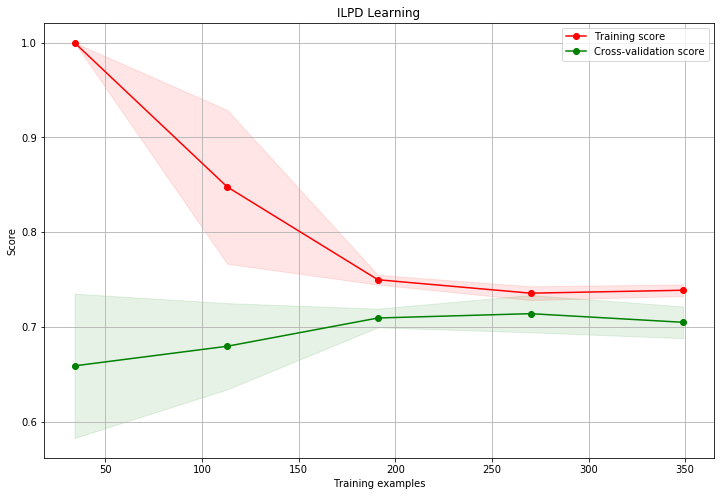

In [25]:
plot_learning_curve(mlp,"ILPD Learning", new_X_train, y_train)

In [26]:
print("Training set score: %f" % mlp.score(new_X_train, y_train))
print("Test set score: %f" % mlp.score(new_X_test, y_test))

Training set score: 0.727689
Test set score: 0.671233


## create a feature ranking

In [27]:
X_train.head()

,Age,TB,DB,ALKPHOS,SGPT,SGOT,TP,ALB,AG Ratio,Gender_Female,Gender_Male
0,0.232558,0.038874,0.076531,0.060556,0.000503,0.004676,0.710145,0.652174,0.357143,0.0,1.0
1,0.511628,0.006702,0.005102,0.060011,0.008040,0.003456,0.507246,0.478261,0.357143,1.0,0.0
2,0.302326,0.004021,0.005102,0.000000,0.010553,0.003456,0.449275,0.543478,0.500000,1.0,0.0
3,0.348837,0.049598,0.096939,0.123295,0.434673,0.146575,0.333333,0.391304,0.392857,0.0,1.0
4,0.104651,0.014745,0.020408,0.279324,0.009548,0.002846,0.753623,0.652174,0.321429,0.0,1.0


In [28]:
# use RFE to retrieve the 5 most informative features from the dataset
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
selector.support_


selector.ranking_

array([6, 1, 2, 5, 1, 1, 1, 4, 1, 7, 3])

As we can see above the most informative features are:
- SGPT
- SGOT
- TP
- ALB
- AG Ratio

In [29]:
# lets try to leave only columns mentioned above
rfe_X_train = X_train.filter(['SGOT', 'SGPT', 'ALKPHOS'], axis=1)
rfe_X_test = X_test.filter(['SGOT', 'SGPT', 'ALKPHOS'], axis=1)

rfe_X_train.head()

,SGOT,SGPT,ALKPHOS
0,0.004676,0.000503,0.060556
1,0.003456,0.008040,0.060011
2,0.003456,0.010553,0.000000
3,0.146575,0.434673,0.123295
4,0.002846,0.009548,0.279324


## new training and predictions

In [30]:
# create 2 layers of 20 nodes each + 2000 iterations
mlp = MLPClassifier(hidden_layer_sizes=(30), max_iter=2000, alpha=1e-4,
                  solver='adam', verbose=10, tol=1e-4, random_state=1,
                  learning_rate_init=0.01)

# train algorithm on training data
mlp.fit(rfe_X_train, y_train.values.ravel())

# make predictions
predictions = mlp.predict(rfe_X_test)

# accuracy score
acc = accuracy_score(y_test, predictions)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))
print("Accuracy Using MLP: " + str(acc)+'\n')

Iteration 1, loss = 0.59694622
Iteration 2, loss = 0.58158878
Iteration 3, loss = 0.57716564
Iteration 4, loss = 0.57563581
Iteration 5, loss = 0.57403255
Iteration 6, loss = 0.57002118
Iteration 7, loss = 0.56633424
Iteration 8, loss = 0.56382294
Iteration 9, loss = 0.56217438
Iteration 10, loss = 0.55903283
Iteration 11, loss = 0.55478123
Iteration 12, loss = 0.55129169
Iteration 13, loss = 0.54999480
Iteration 14, loss = 0.54773962
Iteration 15, loss = 0.54571904
Iteration 16, loss = 0.54335711
Iteration 17, loss = 0.54388736
Iteration 18, loss = 0.54079436
Iteration 19, loss = 0.53964791
Iteration 20, loss = 0.53751029
Iteration 21, loss = 0.53547161
Iteration 22, loss = 0.53569233
Iteration 23, loss = 0.53502529
Iteration 24, loss = 0.53350272
Iteration 25, loss = 0.53150266
Iteration 26, loss = 0.53081479
Iteration 27, loss = 0.53055056
Iteration 28, loss = 0.52930264
Iteration 29, loss = 0.52836888
Iteration 30, loss = 0.52853403
Iteration 31, loss = 0.52756335
Iteration 32, los

/Users/kamil/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 0.62937069
Iteration 2, loss = 0.62603603
Iteration 3, loss = 0.62430910
Iteration 4, loss = 0.62299965
Iteration 5, loss = 0.62149996
Iteration 6, loss = 0.61969670
Iteration 7, loss = 0.61802890
Iteration 8, loss = 0.61654412
Iteration 9, loss = 0.61519316
Iteration 10, loss = 0.61393567
Iteration 11, loss = 0.61287446
Iteration 12, loss = 0.61183926
Iteration 13, loss = 0.61072481
Iteration 14, loss = 0.60966700
Iteration 15, loss = 0.60875568
Iteration 16, loss = 0.60787224
Iteration 17, loss = 0.60702479
Iteration 18, loss = 0.60608409
Iteration 19, loss = 0.60508059
Iteration 20, loss = 0.60405669
Iteration 21, loss = 0.60309936
Iteration 22, loss = 0.60221927
Iteration 23, loss = 0.60135871
Iteration 24, loss = 0.60040904
Iteration 25, loss = 0.59950614
Iteration 26, loss = 0.59844968
Iteration 27, loss = 0.59736533
Iteration 28, loss = 0.59607311
Iteration 29, loss = 0.59515448
Iteration 30, loss = 0.59448838
Iteration 31, loss = 0.59383942
Iteration 32, los

Iteration 134, loss = 0.48786631
Iteration 135, loss = 0.48776460
Iteration 136, loss = 0.48766328
Iteration 137, loss = 0.48756236
Iteration 138, loss = 0.48746228
Iteration 139, loss = 0.48736222
Iteration 140, loss = 0.48726306
Iteration 141, loss = 0.48716552
Iteration 142, loss = 0.48706839
Iteration 143, loss = 0.48697113
Iteration 144, loss = 0.48687413
Iteration 145, loss = 0.48677897
Iteration 146, loss = 0.48668386
Iteration 147, loss = 0.48658978
Iteration 148, loss = 0.48649623
Iteration 149, loss = 0.48640318
Iteration 150, loss = 0.48631096
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59443487
Iteration 2, loss = 0.58044837
Iteration 3, loss = 0.57374906
Iteration 4, loss = 0.57129763
Iteration 5, loss = 0.57024153
Iteration 6, loss = 0.56737738
Iteration 7, loss = 0.56413803
Iteration 8, loss = 0.56066677
Iteration 9, loss = 0.55874603
Iteration 10, loss = 0.55631826
Iteration 11, loss = 0.55534808
Iterat

Iteration 129, loss = 0.50224533
Iteration 130, loss = 0.50135371
Iteration 131, loss = 0.50273428
Iteration 132, loss = 0.50215677
Iteration 133, loss = 0.50173998
Iteration 134, loss = 0.50156267
Iteration 135, loss = 0.50172093
Iteration 136, loss = 0.50176592
Iteration 137, loss = 0.50132759
Iteration 138, loss = 0.50191368
Iteration 139, loss = 0.50174004
Iteration 140, loss = 0.50123906
Iteration 141, loss = 0.50111604
Iteration 142, loss = 0.50180871
Iteration 143, loss = 0.50195786
Iteration 144, loss = 0.50143590
Iteration 145, loss = 0.50114829
Iteration 146, loss = 0.50119362
Iteration 147, loss = 0.50112849
Iteration 148, loss = 0.50128953
Iteration 149, loss = 0.50106864
Iteration 150, loss = 0.50109281
Iteration 151, loss = 0.50137293
Iteration 152, loss = 0.50095686
Iteration 153, loss = 0.50103517
Iteration 154, loss = 0.50255838
Iteration 155, loss = 0.50108803
Iteration 156, loss = 0.50163827
Iteration 157, loss = 0.50123120
Iteration 158, loss = 0.50082855
Iteration 

Iteration 197, loss = 0.52843058
Iteration 198, loss = 0.52813114
Iteration 199, loss = 0.52799972
Iteration 200, loss = 0.52775706
Iteration 201, loss = 0.52742278
Iteration 202, loss = 0.52710720
Iteration 203, loss = 0.52689110
Iteration 204, loss = 0.52666889
Iteration 205, loss = 0.52647654
Iteration 206, loss = 0.52619630
Iteration 207, loss = 0.52590476
Iteration 208, loss = 0.52562583
Iteration 209, loss = 0.52535570
Iteration 210, loss = 0.52507307
Iteration 211, loss = 0.52480075
Iteration 212, loss = 0.52471939
Iteration 213, loss = 0.52452328
Iteration 214, loss = 0.52417262
Iteration 215, loss = 0.52385862
Iteration 216, loss = 0.52361137
Iteration 217, loss = 0.52339842
Iteration 218, loss = 0.52320438
Iteration 219, loss = 0.52297127
Iteration 220, loss = 0.52268656
Iteration 221, loss = 0.52240406
Iteration 222, loss = 0.52214902
Iteration 223, loss = 0.52188719
Iteration 224, loss = 0.52159358
Iteration 225, loss = 0.52141532
Iteration 226, loss = 0.52120784
Iteration 

Iteration 449, loss = 0.47866732
Iteration 450, loss = 0.47849145
Iteration 451, loss = 0.47838813
Iteration 452, loss = 0.47821651
Iteration 453, loss = 0.47803051
Iteration 454, loss = 0.47791367
Iteration 455, loss = 0.47791498
Iteration 456, loss = 0.47761323
Iteration 457, loss = 0.47758521
Iteration 458, loss = 0.47744228
Iteration 459, loss = 0.47738247
Iteration 460, loss = 0.47729598
Iteration 461, loss = 0.47706540
Iteration 462, loss = 0.47693531
Iteration 463, loss = 0.47681207
Iteration 464, loss = 0.47660971
Iteration 465, loss = 0.47626726
Iteration 466, loss = 0.47595416
Iteration 467, loss = 0.47599711
Iteration 468, loss = 0.47618452
Iteration 469, loss = 0.47612312
Iteration 470, loss = 0.47593367
Iteration 471, loss = 0.47557274
Iteration 472, loss = 0.47538764
Iteration 473, loss = 0.47532081
Iteration 474, loss = 0.47531401
Iteration 475, loss = 0.47514894
Iteration 476, loss = 0.47489509
Iteration 477, loss = 0.47477048
Iteration 478, loss = 0.47457553
Iteration 

Iteration 707, loss = 0.45550679
Iteration 708, loss = 0.45547242
Iteration 709, loss = 0.45538836
Iteration 710, loss = 0.45541916
Iteration 711, loss = 0.45527249
Iteration 712, loss = 0.45532317
Iteration 713, loss = 0.45532797
Iteration 714, loss = 0.45517351
Iteration 715, loss = 0.45516075
Iteration 716, loss = 0.45515174
Iteration 717, loss = 0.45512607
Iteration 718, loss = 0.45507788
Iteration 719, loss = 0.45504773
Iteration 720, loss = 0.45492473
Iteration 721, loss = 0.45474502
Iteration 722, loss = 0.45481907
Iteration 723, loss = 0.45478260
Iteration 724, loss = 0.45460887
Iteration 725, loss = 0.45475901
Iteration 726, loss = 0.45475722
Iteration 727, loss = 0.45473004
Iteration 728, loss = 0.45467395
Iteration 729, loss = 0.45464368
Iteration 730, loss = 0.45446926
Iteration 731, loss = 0.45421595
Iteration 732, loss = 0.45451853
Iteration 733, loss = 0.45454444
Iteration 734, loss = 0.45438639
Iteration 735, loss = 0.45409931
Iteration 736, loss = 0.45422818
Iteration 

Iteration 71, loss = 0.51848413
Iteration 72, loss = 0.51799465
Iteration 73, loss = 0.51751948
Iteration 74, loss = 0.51704436
Iteration 75, loss = 0.51656585
Iteration 76, loss = 0.51606196
Iteration 77, loss = 0.51556233
Iteration 78, loss = 0.51507945
Iteration 79, loss = 0.51460441
Iteration 80, loss = 0.51413587
Iteration 81, loss = 0.51368079
Iteration 82, loss = 0.51322053
Iteration 83, loss = 0.51274017
Iteration 84, loss = 0.51225745
Iteration 85, loss = 0.51178356
Iteration 86, loss = 0.51133012
Iteration 87, loss = 0.51086085
Iteration 88, loss = 0.51044413
Iteration 89, loss = 0.51001551
Iteration 90, loss = 0.50956331
Iteration 91, loss = 0.50909510
Iteration 92, loss = 0.50862451
Iteration 93, loss = 0.50818459
Iteration 94, loss = 0.50776264
Iteration 95, loss = 0.50733637
Iteration 96, loss = 0.50690804
Iteration 97, loss = 0.50647339
Iteration 98, loss = 0.50603996
Iteration 99, loss = 0.50560391
Iteration 100, loss = 0.50517527
Iteration 101, loss = 0.50476785
Iterat

Iteration 1, loss = 0.59867422
Iteration 2, loss = 0.58655958
Iteration 3, loss = 0.58094201
Iteration 4, loss = 0.57952247
Iteration 5, loss = 0.57810494
Iteration 6, loss = 0.57647662
Iteration 7, loss = 0.57408167
Iteration 8, loss = 0.57102369
Iteration 9, loss = 0.56894271
Iteration 10, loss = 0.56763655
Iteration 11, loss = 0.56630310
Iteration 12, loss = 0.56468626
Iteration 13, loss = 0.56300026
Iteration 14, loss = 0.56091747
Iteration 15, loss = 0.55896110
Iteration 16, loss = 0.55695735
Iteration 17, loss = 0.55466405
Iteration 18, loss = 0.55194833
Iteration 19, loss = 0.54987551
Iteration 20, loss = 0.54775134
Iteration 21, loss = 0.54646462
Iteration 22, loss = 0.54482350
Iteration 23, loss = 0.54313466
Iteration 24, loss = 0.54165566
Iteration 25, loss = 0.54057244
Iteration 26, loss = 0.53909964
Iteration 27, loss = 0.53792460
Iteration 28, loss = 0.53706981
Iteration 29, loss = 0.53584871
Iteration 30, loss = 0.53474941
Iteration 31, loss = 0.53365679
Iteration 32, los

Iteration 86, loss = 0.56934419
Iteration 87, loss = 0.56887327
Iteration 88, loss = 0.56841542
Iteration 89, loss = 0.56796050
Iteration 90, loss = 0.56745364
Iteration 91, loss = 0.56695576
Iteration 92, loss = 0.56653060
Iteration 93, loss = 0.56608492
Iteration 94, loss = 0.56560854
Iteration 95, loss = 0.56510429
Iteration 96, loss = 0.56467456
Iteration 97, loss = 0.56424062
Iteration 98, loss = 0.56379761
Iteration 99, loss = 0.56334000
Iteration 100, loss = 0.56287766
Iteration 101, loss = 0.56241129
Iteration 102, loss = 0.56193530
Iteration 103, loss = 0.56146315
Iteration 104, loss = 0.56104794
Iteration 105, loss = 0.56057338
Iteration 106, loss = 0.56012785
Iteration 107, loss = 0.55972126
Iteration 108, loss = 0.55931135
Iteration 109, loss = 0.55882868
Iteration 110, loss = 0.55837836
Iteration 111, loss = 0.55793948
Iteration 112, loss = 0.55752409
Iteration 113, loss = 0.55709506
Iteration 114, loss = 0.55658918
Iteration 115, loss = 0.55624549
Iteration 116, loss = 0.

Iteration 400, loss = 0.48575748
Iteration 401, loss = 0.48577196
Iteration 402, loss = 0.48545807
Iteration 403, loss = 0.48533242
Iteration 404, loss = 0.48517144
Iteration 405, loss = 0.48498316
Iteration 406, loss = 0.48497288
Iteration 407, loss = 0.48475883
Iteration 408, loss = 0.48469089
Iteration 409, loss = 0.48439962
Iteration 410, loss = 0.48428850
Iteration 411, loss = 0.48426934
Iteration 412, loss = 0.48412764
Iteration 413, loss = 0.48395908
Iteration 414, loss = 0.48363962
Iteration 415, loss = 0.48357248
Iteration 416, loss = 0.48356353
Iteration 417, loss = 0.48355109
Iteration 418, loss = 0.48302459
Iteration 419, loss = 0.48295965
Iteration 420, loss = 0.48300869
Iteration 421, loss = 0.48275521
Iteration 422, loss = 0.48246517
Iteration 423, loss = 0.48245217
Iteration 424, loss = 0.48218648
Iteration 425, loss = 0.48211811
Iteration 426, loss = 0.48202760
Iteration 427, loss = 0.48173342
Iteration 428, loss = 0.48157236
Iteration 429, loss = 0.48160915
Iteration 

Iteration 664, loss = 0.45799963
Iteration 665, loss = 0.45811571
Iteration 666, loss = 0.45806132
Iteration 667, loss = 0.45791410
Iteration 668, loss = 0.45776965
Iteration 669, loss = 0.45776965
Iteration 670, loss = 0.45772544
Iteration 671, loss = 0.45754977
Iteration 672, loss = 0.45762720
Iteration 673, loss = 0.45771630
Iteration 674, loss = 0.45762745
Iteration 675, loss = 0.45747244
Iteration 676, loss = 0.45741834
Iteration 677, loss = 0.45726990
Iteration 678, loss = 0.45745600
Iteration 679, loss = 0.45746884
Iteration 680, loss = 0.45728759
Iteration 681, loss = 0.45694796
Iteration 682, loss = 0.45708577
Iteration 683, loss = 0.45720896
Iteration 684, loss = 0.45717357
Iteration 685, loss = 0.45702157
Iteration 686, loss = 0.45696909
Iteration 687, loss = 0.45683579
Iteration 688, loss = 0.45662646
Iteration 689, loss = 0.45650275
Iteration 690, loss = 0.45659209
Iteration 691, loss = 0.45645613
Iteration 692, loss = 0.45637306
Iteration 693, loss = 0.45638071
Iteration 

Iteration 154, loss = 0.52644306
Iteration 155, loss = 0.52624280
Iteration 156, loss = 0.52604552
Iteration 157, loss = 0.52585153
Iteration 158, loss = 0.52566076
Iteration 159, loss = 0.52547239
Iteration 160, loss = 0.52528673
Iteration 161, loss = 0.52510327
Iteration 162, loss = 0.52492237
Iteration 163, loss = 0.52474426
Iteration 164, loss = 0.52456877
Iteration 165, loss = 0.52439616
Iteration 166, loss = 0.52422596
Iteration 167, loss = 0.52405799
Iteration 168, loss = 0.52389219
Iteration 169, loss = 0.52372821
Iteration 170, loss = 0.52356622
Iteration 171, loss = 0.52340850
Iteration 172, loss = 0.52325176
Iteration 173, loss = 0.52309454
Iteration 174, loss = 0.52293880
Iteration 175, loss = 0.52278631
Iteration 176, loss = 0.52263530
Iteration 177, loss = 0.52249132
Iteration 178, loss = 0.52234895
Iteration 179, loss = 0.52220781
Iteration 180, loss = 0.52206797
Iteration 181, loss = 0.52192939
Iteration 182, loss = 0.52179209
Iteration 183, loss = 0.52165610
Iteration 

Iteration 185, loss = 0.51232742
Iteration 186, loss = 0.51220779
Iteration 187, loss = 0.51208890
Iteration 188, loss = 0.51197037
Iteration 189, loss = 0.51185459
Iteration 190, loss = 0.51173883
Iteration 191, loss = 0.51162458
Iteration 192, loss = 0.51150948
Iteration 193, loss = 0.51139455
Iteration 194, loss = 0.51128070
Iteration 195, loss = 0.51116909
Iteration 196, loss = 0.51105654
Iteration 197, loss = 0.51094608
Iteration 198, loss = 0.51083628
Iteration 199, loss = 0.51072469
Iteration 200, loss = 0.51061942
Iteration 201, loss = 0.51050867
Iteration 202, loss = 0.51040238
Iteration 203, loss = 0.51029390
Iteration 204, loss = 0.51018822
Iteration 205, loss = 0.51008270
Iteration 206, loss = 0.50997884
Iteration 207, loss = 0.50986856
Iteration 208, loss = 0.50977255
Iteration 209, loss = 0.50966410
Iteration 210, loss = 0.50955236
Iteration 211, loss = 0.50945220
Iteration 212, loss = 0.50934527
Iteration 213, loss = 0.50924521
Iteration 214, loss = 0.50914534
Iteration 

Iteration 217, loss = 0.50345455
Iteration 218, loss = 0.50273722
Iteration 219, loss = 0.50309259
Iteration 220, loss = 0.50337918
Iteration 221, loss = 0.50294557
Iteration 222, loss = 0.50201743
Iteration 223, loss = 0.50233127
Iteration 224, loss = 0.50265847
Iteration 225, loss = 0.50362288
Iteration 226, loss = 0.50238587
Iteration 227, loss = 0.50136926
Iteration 228, loss = 0.50380207
Iteration 229, loss = 0.50329089
Iteration 230, loss = 0.50201749
Iteration 231, loss = 0.50188433
Iteration 232, loss = 0.50231976
Iteration 233, loss = 0.50142198
Iteration 234, loss = 0.50176720
Iteration 235, loss = 0.50067242
Iteration 236, loss = 0.50194416
Iteration 237, loss = 0.50148571
Iteration 238, loss = 0.50045194
Iteration 239, loss = 0.50088330
Iteration 240, loss = 0.50163352
Iteration 241, loss = 0.50135472
Iteration 242, loss = 0.50034206
Iteration 243, loss = 0.50040022
Iteration 244, loss = 0.50141066
Iteration 245, loss = 0.50127133
Iteration 246, loss = 0.49974247
Iteration 

Iteration 1, loss = 0.63207580
Iteration 2, loss = 0.62870371
Iteration 3, loss = 0.62722459
Iteration 4, loss = 0.62663655
Iteration 5, loss = 0.62594313
Iteration 6, loss = 0.62465775
Iteration 7, loss = 0.62313640
Iteration 8, loss = 0.62159631
Iteration 9, loss = 0.62018374
Iteration 10, loss = 0.61900662
Iteration 11, loss = 0.61827860
Iteration 12, loss = 0.61753871
Iteration 13, loss = 0.61667535
Iteration 14, loss = 0.61568393
Iteration 15, loss = 0.61470546
Iteration 16, loss = 0.61376951
Iteration 17, loss = 0.61292166
Iteration 18, loss = 0.61212169
Iteration 19, loss = 0.61130316
Iteration 20, loss = 0.61039390
Iteration 21, loss = 0.60943934
Iteration 22, loss = 0.60848081
Iteration 23, loss = 0.60760845
Iteration 24, loss = 0.60674554
Iteration 25, loss = 0.60586899
Iteration 26, loss = 0.60496006
Iteration 27, loss = 0.60406176
Iteration 28, loss = 0.60315387
Iteration 29, loss = 0.60224571
Iteration 30, loss = 0.60133376
Iteration 31, loss = 0.60043869
Iteration 32, los

Iteration 276, loss = 0.50973891
Iteration 277, loss = 0.50944923
Iteration 278, loss = 0.50933921
Iteration 279, loss = 0.50915433
Iteration 280, loss = 0.50878434
Iteration 281, loss = 0.50868343
Iteration 282, loss = 0.50847572
Iteration 283, loss = 0.50816182
Iteration 284, loss = 0.50796807
Iteration 285, loss = 0.50776210
Iteration 286, loss = 0.50755415
Iteration 287, loss = 0.50737943
Iteration 288, loss = 0.50715585
Iteration 289, loss = 0.50687112
Iteration 290, loss = 0.50680885
Iteration 291, loss = 0.50655689
Iteration 292, loss = 0.50615594
Iteration 293, loss = 0.50596310
Iteration 294, loss = 0.50577057
Iteration 295, loss = 0.50563137
Iteration 296, loss = 0.50535098
Iteration 297, loss = 0.50516842
Iteration 298, loss = 0.50489120
Iteration 299, loss = 0.50479211
Iteration 300, loss = 0.50462592
Iteration 301, loss = 0.50448346
Iteration 302, loss = 0.50424240
Iteration 303, loss = 0.50409011
Iteration 304, loss = 0.50386766
Iteration 305, loss = 0.50355672
Iteration 

Iteration 593, loss = 0.46302536
Iteration 594, loss = 0.46299840
Iteration 595, loss = 0.46289545
Iteration 596, loss = 0.46273872
Iteration 597, loss = 0.46286335
Iteration 598, loss = 0.46280437
Iteration 599, loss = 0.46259553
Iteration 600, loss = 0.46264527
Iteration 601, loss = 0.46258908
Iteration 602, loss = 0.46245969
Iteration 603, loss = 0.46238244
Iteration 604, loss = 0.46218816
Iteration 605, loss = 0.46199889
Iteration 606, loss = 0.46216466
Iteration 607, loss = 0.46217277
Iteration 608, loss = 0.46212857
Iteration 609, loss = 0.46189086
Iteration 610, loss = 0.46178986
Iteration 611, loss = 0.46184004
Iteration 612, loss = 0.46177249
Iteration 613, loss = 0.46165232
Iteration 614, loss = 0.46150800
Iteration 615, loss = 0.46134688
Iteration 616, loss = 0.46128863
Iteration 617, loss = 0.46135298
Iteration 618, loss = 0.46122210
Iteration 619, loss = 0.46096081
Iteration 620, loss = 0.46095259
Iteration 621, loss = 0.46087617
Iteration 622, loss = 0.46083303
Iteration 

Iteration 87, loss = 0.55109023
Iteration 88, loss = 0.55055546
Iteration 89, loss = 0.55002447
Iteration 90, loss = 0.54949555
Iteration 91, loss = 0.54896952
Iteration 92, loss = 0.54844507
Iteration 93, loss = 0.54792269
Iteration 94, loss = 0.54740933
Iteration 95, loss = 0.54690234
Iteration 96, loss = 0.54639626
Iteration 97, loss = 0.54589177
Iteration 98, loss = 0.54540191
Iteration 99, loss = 0.54491479
Iteration 100, loss = 0.54443070
Iteration 101, loss = 0.54395022
Iteration 102, loss = 0.54347180
Iteration 103, loss = 0.54299778
Iteration 104, loss = 0.54253591
Iteration 105, loss = 0.54207642
Iteration 106, loss = 0.54162171
Iteration 107, loss = 0.54117391
Iteration 108, loss = 0.54073017
Iteration 109, loss = 0.54029233
Iteration 110, loss = 0.53986290
Iteration 111, loss = 0.53944177
Iteration 112, loss = 0.53902617
Iteration 113, loss = 0.53861411
Iteration 114, loss = 0.53820734
Iteration 115, loss = 0.53780958
Iteration 116, loss = 0.53741769
Iteration 117, loss = 0

Iteration 17, loss = 0.54316329
Iteration 18, loss = 0.54178157
Iteration 19, loss = 0.54025514
Iteration 20, loss = 0.53924703
Iteration 21, loss = 0.53772351
Iteration 22, loss = 0.53652755
Iteration 23, loss = 0.53521707
Iteration 24, loss = 0.53388758
Iteration 25, loss = 0.53287691
Iteration 26, loss = 0.53185170
Iteration 27, loss = 0.53076659
Iteration 28, loss = 0.53021948
Iteration 29, loss = 0.52934668
Iteration 30, loss = 0.52832407
Iteration 31, loss = 0.52718116
Iteration 32, loss = 0.52698130
Iteration 33, loss = 0.52573338
Iteration 34, loss = 0.52619355
Iteration 35, loss = 0.52582962
Iteration 36, loss = 0.52463243
Iteration 37, loss = 0.52366086
Iteration 38, loss = 0.52389896
Iteration 39, loss = 0.52246709
Iteration 40, loss = 0.52253842
Iteration 41, loss = 0.52244687
Iteration 42, loss = 0.52133572
Iteration 43, loss = 0.52095770
Iteration 44, loss = 0.52007841
Iteration 45, loss = 0.51949729
Iteration 46, loss = 0.51886912
Iteration 47, loss = 0.51873807
Iteratio

Iteration 196, loss = 0.50785243
Iteration 197, loss = 0.50784657
Iteration 198, loss = 0.50770203
Iteration 199, loss = 0.50779356
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63207580
Iteration 2, loss = 0.62870371
Iteration 3, loss = 0.62722459
Iteration 4, loss = 0.62663655
Iteration 5, loss = 0.62594313
Iteration 6, loss = 0.62465775
Iteration 7, loss = 0.62313640
Iteration 8, loss = 0.62159631
Iteration 9, loss = 0.62018374
Iteration 10, loss = 0.61900662
Iteration 11, loss = 0.61827860
Iteration 12, loss = 0.61753871
Iteration 13, loss = 0.61667535
Iteration 14, loss = 0.61568393
Iteration 15, loss = 0.61470546
Iteration 16, loss = 0.61376951
Iteration 17, loss = 0.61292166
Iteration 18, loss = 0.61212169
Iteration 19, loss = 0.61130316
Iteration 20, loss = 0.61039390
Iteration 21, loss = 0.60943934
Iteration 22, loss = 0.60848081
Iteration 23, loss = 0.60760845
Iteration 24, loss = 0.60674554
Iteration 25, loss 

Iteration 266, loss = 0.51189918
Iteration 267, loss = 0.51165207
Iteration 268, loss = 0.51144852
Iteration 269, loss = 0.51125453
Iteration 270, loss = 0.51113558
Iteration 271, loss = 0.51083856
Iteration 272, loss = 0.51064931
Iteration 273, loss = 0.51036865
Iteration 274, loss = 0.51015147
Iteration 275, loss = 0.51001336
Iteration 276, loss = 0.50973891
Iteration 277, loss = 0.50944923
Iteration 278, loss = 0.50933921
Iteration 279, loss = 0.50915433
Iteration 280, loss = 0.50878434
Iteration 281, loss = 0.50868343
Iteration 282, loss = 0.50847572
Iteration 283, loss = 0.50816182
Iteration 284, loss = 0.50796807
Iteration 285, loss = 0.50776210
Iteration 286, loss = 0.50755415
Iteration 287, loss = 0.50737943
Iteration 288, loss = 0.50715585
Iteration 289, loss = 0.50687112
Iteration 290, loss = 0.50680885
Iteration 291, loss = 0.50655689
Iteration 292, loss = 0.50615594
Iteration 293, loss = 0.50596310
Iteration 294, loss = 0.50577057
Iteration 295, loss = 0.50563137
Iteration 

Iteration 697, loss = 0.45621225
Iteration 698, loss = 0.45619035
Iteration 699, loss = 0.45601793
Iteration 700, loss = 0.45593061
Iteration 701, loss = 0.45591367
Iteration 702, loss = 0.45591061
Iteration 703, loss = 0.45588965
Iteration 704, loss = 0.45574219
Iteration 705, loss = 0.45562807
Iteration 706, loss = 0.45556866
Iteration 707, loss = 0.45550679
Iteration 708, loss = 0.45547242
Iteration 709, loss = 0.45538836
Iteration 710, loss = 0.45541916
Iteration 711, loss = 0.45527249
Iteration 712, loss = 0.45532317
Iteration 713, loss = 0.45532797
Iteration 714, loss = 0.45517351
Iteration 715, loss = 0.45516075
Iteration 716, loss = 0.45515174
Iteration 717, loss = 0.45512607
Iteration 718, loss = 0.45507788
Iteration 719, loss = 0.45504773
Iteration 720, loss = 0.45492473
Iteration 721, loss = 0.45474502
Iteration 722, loss = 0.45481907
Iteration 723, loss = 0.45478260
Iteration 724, loss = 0.45460887
Iteration 725, loss = 0.45475901
Iteration 726, loss = 0.45475722
Iteration 

Iteration 164, loss = 0.52456877
Iteration 165, loss = 0.52439616
Iteration 166, loss = 0.52422596
Iteration 167, loss = 0.52405799
Iteration 168, loss = 0.52389219
Iteration 169, loss = 0.52372821
Iteration 170, loss = 0.52356622
Iteration 171, loss = 0.52340850
Iteration 172, loss = 0.52325176
Iteration 173, loss = 0.52309454
Iteration 174, loss = 0.52293880
Iteration 175, loss = 0.52278631
Iteration 176, loss = 0.52263530
Iteration 177, loss = 0.52249132
Iteration 178, loss = 0.52234895
Iteration 179, loss = 0.52220781
Iteration 180, loss = 0.52206797
Iteration 181, loss = 0.52192939
Iteration 182, loss = 0.52179209
Iteration 183, loss = 0.52165610
Iteration 184, loss = 0.52152133
Iteration 185, loss = 0.52138887
Iteration 186, loss = 0.52125713
Iteration 187, loss = 0.52112557
Iteration 188, loss = 0.52099544
Iteration 189, loss = 0.52086709
Iteration 190, loss = 0.52073990
Iteration 191, loss = 0.52061380
Iteration 192, loss = 0.52048867
Iteration 193, loss = 0.52036448
Iteration 

Iteration 174, loss = 0.52725937
Iteration 175, loss = 0.52713299
Iteration 176, loss = 0.52702236
Iteration 177, loss = 0.52690342
Iteration 178, loss = 0.52677369
Iteration 179, loss = 0.52664908
Iteration 180, loss = 0.52654804
Iteration 181, loss = 0.52644110
Iteration 182, loss = 0.52631498
Iteration 183, loss = 0.52618761
Iteration 184, loss = 0.52607980
Iteration 185, loss = 0.52597503
Iteration 186, loss = 0.52586269
Iteration 187, loss = 0.52574823
Iteration 188, loss = 0.52563764
Iteration 189, loss = 0.52553477
Iteration 190, loss = 0.52543018
Iteration 191, loss = 0.52532080
Iteration 192, loss = 0.52521900
Iteration 193, loss = 0.52511863
Iteration 194, loss = 0.52501738
Iteration 195, loss = 0.52491566
Iteration 196, loss = 0.52481423
Iteration 197, loss = 0.52471280
Iteration 198, loss = 0.52461299
Iteration 199, loss = 0.52451631
Iteration 200, loss = 0.52442024
Iteration 201, loss = 0.52432354
Iteration 202, loss = 0.52422881
Iteration 203, loss = 0.52413060
Iteration 

Iteration 124, loss = 0.50485121
Iteration 125, loss = 0.50406029
Iteration 126, loss = 0.50737139
Iteration 127, loss = 0.50579179
Iteration 128, loss = 0.50783978
Iteration 129, loss = 0.50460331
Iteration 130, loss = 0.50451643
Iteration 131, loss = 0.50389091
Iteration 132, loss = 0.50490407
Iteration 133, loss = 0.50427000
Iteration 134, loss = 0.50423070
Iteration 135, loss = 0.50372994
Iteration 136, loss = 0.50356441
Iteration 137, loss = 0.50362138
Iteration 138, loss = 0.50451885
Iteration 139, loss = 0.50362967
Iteration 140, loss = 0.50302272
Iteration 141, loss = 0.50306287
Iteration 142, loss = 0.50334028
Iteration 143, loss = 0.50302662
Iteration 144, loss = 0.50278599
Iteration 145, loss = 0.50287230
Iteration 146, loss = 0.50295171
Iteration 147, loss = 0.50244975
Iteration 148, loss = 0.50336239
Iteration 149, loss = 0.50257952
Iteration 150, loss = 0.50231810
Iteration 151, loss = 0.50242817
Iteration 152, loss = 0.50261758
Iteration 153, loss = 0.50191319
Iteration 

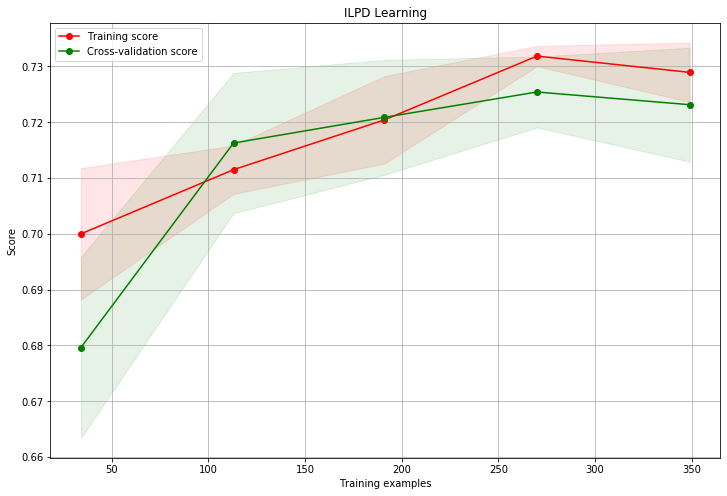

In [31]:
plot_learning_curve(mlp,"ILPD Learning", rfe_X_train, y_train)